<a href="https://colab.research.google.com/github/parhamvz73/Machine-Learning/blob/main/Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0: Pre-Start Phase: Setup & Preparation

Why I Am Doing This

Before diving into project goals and data exploration, I need to make sure my `environment is ready`, my `tools are chosen`, and my `data is accessible`.
This prevents unnecessary interruptions later.

## Essential Installations

I make sure the following are installed or available:

- **Python (>=3.8)**

- **Core Libraries**: `numpy`, `pandas`, `matplotlib`, `seaborn`

- **ML Libraries**: `scikit-learn`, `xgboost` / `lightgbm`, `tensorflow` / `pytorch` (optional)

- **Utilities**: `jupyter` / `colab` support, `git` for version control

>In Colab, many libraries are pre-installed. On local environments, I install via `pip` or `conda`.

In [1]:
# ==========================
# Checking python version
# ==========================
import sys
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


In [48]:
# ==========================
# 📦 Core Python Libraries
# ==========================
import numpy as np                # numerical computing (arrays, math, stats)
import pandas as pd               # data manipulation and analysis
import math #math is Python’s built-in mathematics library.
# ==========================
# 🎨 Visualization Libraries
# ==========================
import matplotlib.pyplot as plt   # plotting and charts
import seaborn as sns             # statistical data visualization
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display, clear_output

# ==========================
# 🤖 Machine Learning Libraries
# ==========================
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Popular gradient boosting frameworks
import xgboost as xgb             # XGBoost
import lightgbm as lgb            # LightGBM

# ==========================
# 🧠 Deep Learning (Optional)
# ==========================
import tensorflow as tf           # TensorFlow + Keras (deep learning framework)
import torch                      # PyTorch (alternative deep learning framework)


## Device & Environment Selection

- Local Machine: good for small datasets, fast iterations.

- Cloud Notebooks (e.g., Google Colab, Kaggle, JupyterHub): ideal for portability, GPU/TPU access.

- Enterprise / Server Environment: useful for large datasets, production-like workflows.

>I choose based on dataset size, compute needs, and collaboration requirements.

In [3]:
device_name = tf.test.gpu_device_name()
if device_name:
    print(f"✅ GPU is available: {device_name}")
else:
    print("💻 Running on CPU (no GPU detected)")

💻 Running on CPU (no GPU detected)


## Importing & Accessing Data

I make sure my dataset is available in the right place:

- **CSV / Excel files**: upload to Colab, local folder, or mounted drive.

- **Databases**: connect with `SQLAlchemy` or native connectors.

- **APIs / External Sources**: authenticate and fetch programmatically.

>Key point: I always confirm the dataset loads without errors before moving to Step 1.

In [4]:
#Functions for reading different files and formats

def import_csv(file_path: str):
    """
    Loads a CSV file into a pandas DataFrame and previews the first few rows.

    Parameters:
    -----------
    file_path : str
        The path or URL of the CSV file.

    Returns:
    --------
    df : pandas.DataFrame
        The loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"✅ Data successfully imported from: {file_path}\n")
        print(f"🔹 Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

        print("🔍 Data Types:\n")
        print(df.dtypes)
        print("\nℹ️ DataFrame Info:\n")
        print(df.info())

        return df
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return None

# What is try and except?
# In Python, sometimes code can fail — for example:
# File not found
# Wrong file format
# Network not available
# Division by zero
# Wrong data type
# Instead of your whole program crashing with a scary error, you can tell Python:
# "Try to run this code.
# If something goes wrong, don’t crash — instead, handle the error gracefully."
# That’s what try / except does.

In [63]:
def show_png(file_path: str):
    """
    Reads and displays a PNG (or other supported image) file.

    Parameters
    ----------
    file_path : str
        Path to the image file.
    """
    try:
        img = mpimg.imread(file_path)   # read image
        plt.figure(figsize=(8, 6))      # adjust size if needed
        plt.imshow(img)                 # show image
        plt.axis("off")                 # hide axes for clean view
        plt.show()
    except Exception as e:
        print(f"❌ Error reading file: {e}")

In [5]:
#Calling import functions
df = import_csv('/content/drive/MyDrive/ML Projects/Titanic-Disaster/data/train.csv')

✅ Data successfully imported from: /content/drive/MyDrive/ML Projects/Titanic-Disaster/data/train.csv

🔹 Shape: 891 rows × 12 columns

🔍 Data Types:

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

ℹ️ DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket   

## Pre-Start Checklist

 - ✅ Selected device/environment (local, cloud, or server)

 - ⬜️ Installed required libraries and dependencies

 - ⬜️ Verified Python + package versions are compatible

 - ⬜️ Imported dataset into the environment

 - ⬜️ Performed a quick test load (types, info, shape and DataFrame table)

# Step 1: Project Overview & Problem Definition

**Why I Am Starting With This**

Before I jump into coding, cleaning data, or building models, I want to clearly understand the problem I’m solving.
If I don’t do this properly:

1.  might waste time exploring irrelevant aspects of the data.

2. I won’t know how to measure whether my model is “good enough.”

3. I might accidentally draw wrong conclusions because I didn’t think about assumptions and limitations.

>From my perspective, a well-defined problem statement is the foundation of any successful data science project.

## My Project Title

I always start with a **simple** but **descriptive** project title.

Weak title: ***"Titanic Dataset"***

My title: ***"Predicting Survival on the Titanic (Binary Classification Project)"***

This way, anyone reading my notebook will immediately know:

1. What the project is about

2. What type of machine learning task I am working on (classification)

## Background / Context

Here I describe the story behind the dataset and why it matters to me.

I always start by asking myself a few key questions:

- Where does the dataset come from?

- What type of information does it contain?

- Why is this problem important or valuable to solve?

>The dataset I am working with contains records of individuals, items, or events, along with several descriptive features. The data is intended to support the prediction or classification of an outcome variable.

Why is this important for me?

- It is a commonly used dataset for practicing machine learning and gives me a safe environment to improve my workflow.

- It is also inspired by real-world problems, where social, demographic, business, or environmental factors have a significant impact on outcomes.

## Problem Statement

I want to keep this short and precise.

- **Input:** Features or attributes available in the dataset (e.g., numerical, categorical, or text-based variables).

- **Output:** Target outcome (e.g., a binary label, a continuous value, or a category).

**My problem statement:**

>The goal of my project is to predict the target outcome based on the available descriptive and contextual features in the dataset.

##Goals & Objectives

I split my goals into primary and secondary to stay organized.

**Primary Goal:**

- Build a machine learning model that predicts the target variable with at least a predefined performance threshold (e.g., accuracy above 80%).

**Secondary Goals:**

- Perform exploratory data analysis (EDA) to discover meaningful patterns.

- Visualize which groups or categories show significant differences in outcomes.

- Identify the most important predictors or drivers of the target variable.

- Document assumptions, challenges, and limitations clearly.

## Success Criteria & Evaluation Metrics

For me, success means having a measurable metric that I can track.

Depending on the project type, I might use:

- **Classification problems:** ***Accuracy, Precision, Recall, F1-score, ROC-AUC***

- **Regression problems:** ***MSE, RMSE, MAE, R²***

Since evaluation criteria often depend on the project context, I will choose one primary metric and track it consistently throughout the project.

| Feature   | Description     | Example |  
|-----------|----------------|---------|  
| Classification      | Accuracy, Precision, Recall, AUC | Accuracy (example) |  
| Regression       | MSE, RMSE, R²   | RMSE (example)  |  


## Assumptions & Limitations

I want to be honest about what I assume and what might limit my work.

- **My Assumptions:**

  - The dataset is representative of the real-world scenario.

   - Missing values can be imputed (**Imputation**: the process or method of replacing missing values in a dataset.) without introducing heavy bias.

    - The provided features are sufficient to train a predictive model.

- **My Limitations:**

   - The dataset may be relatively small or imbalanced(**Imbalanced data** means the target variable’s classes are not represented equally.
One class has way more examples than the other(s)).

   - Some variables may contain too many missing values to be useful.

   - Historical, demographic, or business biases may affect predictions.

>⚠️ By writing this down, I remind myself (and anyone reading) not to over-interpret the results.

##My Project Checklist

I use a simple checklist to stay organized:

- ✅ Define project title

- ✅ Write problem statement

- ⬜️ Explore dataset source and size

- ⬜️ Identify target variable

- ⬜️ Choose evaluation metric

- ⬜️ Document assumptions and limitations

# Step 2: Data Dictionary & Schema

Here I describe the structure of my dataset and document each column so I have a clear reference throughout the project.

I always start by asking myself a few key questions:

- What columns exist in the dataset?

- What type of values do they contain (numeric, categorical, text, date)?

- Which ones are identifiers, features, targets, or metadata?

- How much missing data do I need to account for?

>A well-written data dictionary helps me avoid confusion later, ensures I handle missing values correctly, and gives me a map for cleaning, encoding, and modeling.

## Schema Overview (Template)

I create a table that summarizes each column.

| Column Name | Role (ID / Target / Feature / Meta) | Data Type | Unit / Format | Allowed Values / Range | Missing % | Description                                            |
| ----------- | ----------------------------------- | --------- | ------------- | ---------------------- | --------- | ------------------------------------------------------ |
| id          | ID                                  | integer   | unique id     | positive integers      | 0%        | Unique identifier per row                              |
| target      | Target                              | int (0/1) | binary        | {0,1} or {yes,no}      | 0%        | The outcome variable I want to predict                 |
| feature\_1  | Feature                             | float     | numeric       | ≥0                     | 5%        | Continuous variable representing a measurable property |
| feature\_2  | Feature                             | category  | string        | {A, B, C, D}           | 0%        | Categorical variable with limited values               |
| feature\_3  | Feature                             | datetime  | YYYY-MM-DD    | valid date range       | 2%        | Date or time-related variable                          |
| notes       | Meta                                | text      | free string   | n/a                    | 10%       | Optional comments or additional info                   |


In [27]:
# ============================
# 📊 Numerical Columns
# ============================
def get_numerical_columns(df):
    """
    Returns numerical columns from a DataFrame and prints summary.
    Includes missing values count.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64'])

    if not num_cols.empty:
        print("🔢 Numerical Columns:")
        print(f"Shape: {num_cols.shape}")
        print(f"Columns: {list(num_cols.columns)}\n")

        # Missing values
        print("🚨 Missing Values per Column:")
        print(num_cols.isnull().sum())
        print("\n📊 Summary Statistics:\n")
        print(num_cols.describe().T)  # transpose for readability
    else:
        print("⚠️ No numerical columns found.")

    return num_cols


In [33]:
df_num = get_numerical_columns(df)

🔢 Numerical Columns:
Shape: (891, 7)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

🚨 Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

📊 Summary Statistics:

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Su

In [29]:
# ============================
# 🏷️ Categorical Columns
# ============================
def get_categorical_columns(df):
    """
    Returns categorical/object/bool columns from a DataFrame and prints summary.
    Includes missing values count.
    """
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool'])

    if not cat_cols.empty:
        print("🏷️ Categorical Columns:")
        print(f"Shape: {cat_cols.shape}")
        print(f"Columns: {list(cat_cols.columns)}\n")

        # Missing values
        print("🚨 Missing Values per Column:")
        print(cat_cols.isnull().sum())
        print("\n🔎 Unique Values per Column:\n")
        for col in cat_cols.columns:
            print(f"{col}: {cat_cols[col].nunique()} unique values")
    else:
        print("⚠️ No categorical columns found.")

    return cat_cols


In [32]:
df_cat = get_categorical_columns(df)

🏷️ Categorical Columns:
Shape: (891, 5)
Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

🚨 Missing Values per Column:
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

🔎 Unique Values per Column:

Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [25]:
# ============================
# 📅 Datetime Columns
# ============================
def get_datetime_columns(df):
    """
    Returns datetime columns from a DataFrame and prints summary.
    """
    dt_cols = df.select_dtypes(include=['datetime64'])

    if not dt_cols.empty:
        print("📅 Datetime Columns:")
        print(f"Shape: {dt_cols.shape}")
        print(f"Columns: {list(dt_cols.columns)}\n")
        print("Summary:\n")
        for col in dt_cols.columns:
            print(f"{col}: min={dt_cols[col].min()}, max={dt_cols[col].max()}")
    else:
        print("⚠️ No datetime columns found.")

    return dt_cols


In [31]:
df_date = get_datetime_columns(df)

⚠️ No datetime columns found.


## Field-by-Field Notes

Sometimes a table is not enough. For important variables, I write a short explanation:

- **Target Variable:**

>This is the label I am trying to predict. It is only present in the training set and absent in the test set. I also check its distribution to see if it is balanced or imbalanced.

- **Identifiers:**

>Unique IDs are useful for joining or submissions but not included in the model.

- **Categorical Features:**

>I note all distinct categories and check if rare levels exist that should be grouped into “Other.”

- **Datetime Features:**

>For date fields, I record the format, timezone, and coverage period. Later I might extract useful components like year, month, or weekday.

- **Numeric Features:**

>I record valid ranges and units. If there are impossible values (e.g., negatives where not expected), I log them for correction.

## Missingness Audit

I check how many missing values exist in each column and plan how to handle them.

| Column     | Missing % | Possible Reason    | Imputation Plan                  |
| ---------- | --------- | ------------------ | -------------------------------- |
| feature\_1 | 5%        | data not recorded  | fill with median or group median |
| feature\_3 | 2%        | occasional errors  | forward fill / interpolation     |
| notes      | 10%       | optional free text | ignore for modeling              |


## Categorical Levels & Encoding Plan

For each categorical feature, I plan how I will encode it:

- feature_2: 4 levels {A, B, C, D} → one-hot encoding

- feature_city: 200+ levels → group rare categories into “Other,” then one-hot encode

- feature_quality: ordinal {low, medium, high} → label encoding with order

## Planned Derived Features

I also note any new features I may create later:

`feature_ratio = feature_a / feature_b`

`days_since_event = current_date - feature_3`

`is_missing_flag = 1 if feature_1 is missing, else 0`

## My Data Dictionary Checklist

- ✅ I listed all columns with descriptions

- ✅ I defined data types and valid ranges

- ⬜️ I recorded missingness per column

- ⬜️ I assigned roles (ID, Target, Feature, Meta)

- ⬜️ I drafted encoding and imputation strategies

- ⬜️ I logged potential derived features

# Step 3: Dataset Overview & Initial Inspection (EDA-0)

Why I Am Doing This

Before I clean, transform, or model anything, I want to get familiar with the dataset at a high level.
This is like taking a first walk through the data:

- How many rows and columns are there?

- What types of variables am I dealing with?

- How balanced is the target variable?

- Do I notice any immediate problems (missing values, duplicates, strange outliers)?

>The goal here is not deep analysis yet — just basic orientation so I know what I’m working with.

## Dataset Snapshot

The first thing I check is the basic shape and structure of the dataset.

- Number of rows: total observations (how many examples I have)

- Number of columns: total features (how many variables I can work with)

- Granularity: what each row represents (an individual, a transaction, a product, a time series point, etc.)

- Files / splits: do I have train.csv / test.csv, or just one dataset to split myself?

I also want to confirm if the dataset is small, medium, or large, since that affects how I’ll handle computation.

## Data Types & Structure

I then review the types of variables:

- Numeric (continuous / discrete): e.g., age, income, counts

- Categorical (nominal / ordinal): e.g., gender, class, quality rating

- Datetime / temporal: e.g., order date, timestamp

- Text / free-form: e.g., comments, names, reviews

- Identifiers / keys: unique IDs, transaction numbers

>This helps me plan how I’ll encode variables later (scaling for numbers, one-hot encoding for categories, extracting components for dates, etc.).

## Target Variable (for Supervised Projects)

If my project is supervised (classification or regression), I look closely at the target column:

- Is the target present only in training data and not in test?

- How many unique values does it have (binary, multi-class, continuous)?

- What is the distribution (balanced or imbalanced)?

| Target Value | Count | Percentage |
| ------------ | ----- | ---------- |
| Class 0      | …     | … %        |
| Class 1      | …     | … %        |
| **Total**    | …     | 100%       |

>If I find imbalance (e.g., 90% vs 10%), I know I’ll need to use metrics like F1-score, ROC-AUC, or balanced accuracy instead of plain accuracy.

## Missing Values Overview

At this stage, I don’t fix missing values yet — I just record them.

- Which columns have missing values?

- What percentage of the data is missing in each column?

- Does missingness look random, or is it tied to specific conditions?

| Column     | Missing % | Notes                     |
| ---------- | --------- | ------------------------- |
| feature\_1 | 5%        | likely missing at random  |
| feature\_2 | 0%        | complete                  |
| feature\_3 | 20%       | might depend on subgroups |


In [35]:
def analyze_target(df, target_col):
    """
    Analyze the target column in a dataset:
    - Check if target exists
    - Count unique values
    - Identify problem type (binary, multi-class, regression)
    - Show distribution and balance

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset
    target_col : str
        The name of the target column

    Returns:
    --------
    dict
        Dictionary with analysis results
    """
    if target_col not in df.columns:
        print(f"❌ Target column '{target_col}' not found in DataFrame.")
        return None

    target = df[target_col]

    # Unique values
    unique_vals = target.nunique()

    # Detect problem type
    if pd.api.types.is_numeric_dtype(target):
        if unique_vals <= 20:  # numeric but small number of classes
            if unique_vals == 2:
                problem_type = "Binary Classification"
            else:
                problem_type = "Multi-class Classification"
        else:
            problem_type = "Regression (Continuous)"
    else:
        if unique_vals == 2:
            problem_type = "Binary Classification"
        else:
            problem_type = "Multi-class Classification"

    # Distribution
    print(f"🎯 Target Column: {target_col}")
    print(f"📊 Unique Values: {unique_vals}")
    print(f"🧩 Problem Type: {problem_type}\n")

    print("🔎 Distribution:")
    value_counts = target.value_counts(dropna=False)
    print(value_counts)
    print("\n📐 Percentage Distribution:")
    print((value_counts / len(target) * 100).round(2).astype(str) + '%')

    # Check imbalance (simple rule: minority class <20% of majority)
    if problem_type in ["Binary Classification", "Multi-class Classification"]:
        ratio = value_counts.max() / value_counts.min()
        if ratio > 4:  # adjustable threshold
            balance_note = "⚠️ Imbalanced target"
        else:
            balance_note = "✅ Balanced target"
        print(f"\n⚖️ Balance Check: {balance_note}")
    else:
        print("\n⚖️ Balance Check: Not applicable for regression.")

    return {
        "target": target_col,
        "unique_values": unique_vals,
        "problem_type": problem_type,
        "distribution": value_counts.to_dict()
    }


In [36]:
df_target = analyze_target(df, 'Survived')

🎯 Target Column: Survived
📊 Unique Values: 2
🧩 Problem Type: Binary Classification

🔎 Distribution:
Survived
0    549
1    342
Name: count, dtype: int64

📐 Percentage Distribution:
Survived
0    61.62%
1    38.38%
Name: count, dtype: object

⚖️ Balance Check: ✅ Balanced target


## Quick Descriptive Stats

I generate basic descriptive statistics to get a sense of the data:

- For numeric columns: mean, median, min, max, standard deviation

- For categorical columns: number of unique values, most common categories

- For datetime columns: range of dates, earliest/latest record

This gives me early warnings of:

- Unrealistic values (e.g., negative ages, impossible dates)

- Very high cardinality (e.g., 10,000 unique categories for a “city” column)

- Potential outliers

## Duplicates & Keys

I check whether:

- Each row is unique (based on the supposed key column).

- There are any duplicate rows or IDs.

- Keys or identifiers are truly unique — if not, I log this for cleaning later.

In [37]:
import pandas as pd

def analyze_identifier(df: pd.DataFrame, id_col: str):
    """
    Analyze an identifier column:
    - existence check
    - dtype, nulls
    - unique count
    - duplicate-ID summary (which IDs repeat and how many times)

    Returns:
      {
        'id_col': str,
        'dtype': dtype,
        'n_rows': int,
        'n_null': int,
        'n_unique': int,
        'n_duplicate_ids': int,     # number of ID values that appear >1
        'duplicate_ids_summary': pd.DataFrame,  # columns: [id_col, count]
        'rows_with_duplicate_ids': pd.DataFrame # all rows where ID repeats
      }
    """
    if id_col not in df.columns:
        print(f"❌ Column '{id_col}' not found.")
        return None

    n_rows = len(df)
    dtype = df[id_col].dtype
    n_null = df[id_col].isna().sum()
    n_unique = df[id_col].nunique(dropna=False)

    # IDs that repeat (value_counts > 1)
    vc = df[id_col].value_counts(dropna=False)
    dup_ids_summary = (
        vc[vc > 1]
        .sort_values(ascending=False)
        .rename('count')
        .reset_index()
        .rename(columns={'index': id_col})
    )
    n_dup_ids = len(dup_ids_summary)

    # All rows where the ID is duplicated (to inspect)
    rows_with_dup_ids = df[df[id_col].duplicated(keep=False)].sort_values(by=id_col)

    # Pretty print
    print(f"🔎 Identifier analysis for '{id_col}':")
    print(f"• Rows: {n_rows}")
    print(f"• Dtype: {dtype}")
    print(f"• Nulls: {n_null}")
    print(f"• Unique (incl. NaN): {n_unique}")
    print(f"• Distinct IDs that repeat (>1): {n_dup_ids}")

    if n_dup_ids > 0:
        print("\n📋 Top repeating IDs (head):")
        display(dup_ids_summary.head(10))
    else:
        print("\n✅ No repeating IDs found.")

    return {
        'id_col': id_col,
        'dtype': dtype,
        'n_rows': n_rows,
        'n_null': n_null,
        'n_unique': n_unique,
        'n_duplicate_ids': n_dup_ids,
        'duplicate_ids_summary': dup_ids_summary,
        'rows_with_duplicate_ids': rows_with_dup_ids
    }


In [39]:
df_ID = analyze_identifier  (df, 'PassengerId')

🔎 Identifier analysis for 'PassengerId':
• Rows: 891
• Dtype: int64
• Nulls: 0
• Unique (incl. NaN): 891
• Distinct IDs that repeat (>1): 0

✅ No repeating IDs found.


In [38]:
def find_exact_duplicates(df: pd.DataFrame, subset: list | None = None):
    """
    Find exact duplicate rows.

    Parameters:
      df: DataFrame to analyze (can be full df or a filtered subset like duplicate-ID rows)
      subset: list of column names to consider for equality (None = all columns)

    Returns:
      {
        'n_exact_duplicates': int,             # count of rows that are duplicates (not unique)
        'exact_duplicate_rows': pd.DataFrame,  # all rows that have duplicates
        'duplicate_groups': dict               # {fingerprint: row_indices} groups of identical rows
      }
    """
    # Mask of rows that are duplicates (mark all members of duplicate groups)
    mask = df.duplicated(subset=subset, keep=False)
    dup_rows = df[mask]

    # Build simple group keys to show which rows are identical
    if subset is None:
        subset = df.columns.tolist()

    # Create a fingerprint (tuple of values) per row across the subset
    # Use fillna to make NaNs comparable in the tuple
    fp_series = df[subset].apply(lambda r: tuple([('_NaN_' if pd.isna(v) else v) for v in r]), axis=1)
    groups = {}
    for idx, fp in fp_series[mask].items():
        groups.setdefault(fp, []).append(idx)

    # Keep only groups with size > 1
    groups = {fp: idxs for fp, idxs in groups.items() if len(idxs) > 1}

    print("🔁 Exact duplicate rows check:")
    if dup_rows.empty:
        print("✅ No exact duplicate rows found (under given subset).")
    else:
        print(f"• Rows involved in duplicates: {len(dup_rows)}")
        print(f"• Number of duplicate groups: {len(groups)}")
        # Show a small preview
        if len(dup_rows) > 0:
            print("\n📋 Preview of duplicate rows (head):")
            display(dup_rows.head(10))

        # Optionally show group sizes summary
        sizes = pd.Series([len(v) for v in groups.values()]).value_counts().sort_index()
        print("\n📦 Group size distribution (how many groups of size k):")
        display(pd.DataFrame({'group_size': sizes.index, 'n_groups': sizes.values}))

    return {
        'n_exact_duplicates': len(dup_rows),
        'exact_duplicate_rows': dup_rows,
        'duplicate_groups': groups
    }


In [41]:
df_duplicates = find_exact_duplicates(df)

🔁 Exact duplicate rows check:
✅ No exact duplicate rows found (under given subset).


## First Impressions & Notes

At the end of this inspection, I write down my initial thoughts:

- What seems straightforward and ready to use?

- Which features look suspicious or noisy?

- Which areas need deeper exploration in the next step (EDA-1)?

## My Initial Inspection Checklist

 - ✅ Checked dataset shape (rows, columns)

 - ✅ Confirmed what each row represents (granularity)

 - ⬜️ Reviewed variable types (numeric, categorical, datetime, text, ID)

 - ⬜️ Inspected target variable distribution (if applicable)

 - ⬜️ Logged missing values per column

 - ⬜️ Reviewed descriptive statistics

 - ⬜️ Checked for duplicates and unique IDs

 - ⬜️ Wrote down first impressions

# Step 4: Exploratory Data Analysis (EDA-1)

**Why I Am Doing This**

Now that I know the basic structure of my dataset, I want to explore it in more depth.
The purpose of this step is not yet to build models, but to:

- Understand the distribution of variables.

- Detect patterns, correlations, and group differences.

- Spot outliers, anomalies(*weird data point*), or data quality issues.
   - **Examples of Anomalies**

      - Finance / Banking → fraudulent transactions (e.g., $10,000 charged when typical is $50).

      - Healthcare → unusual vital signs (sudden spike in blood pressure).

      - Manufacturing / IoT sensors → sudden temperature jump in a machine.

      - Web traffic → abnormal spike in users visiting a site at 3am.

      - Datasets → typos, outliers, missing values, wrong units (e.g., age = 999).
- Generate hypotheses about what features may matter for prediction.

>EDA is about asking questions like: “What influences the target? Are there clear groups or trends? What features interact with each other?”

## Univariate Analysis

I start with one variable at a time:

- Numeric features: check histograms, boxplots, and descriptive statistics.

   - Are they normally distributed or skewed?

   - Do they have extreme values?

   - Are there obvious data entry errors?

- Categorical features: check frequency counts and bar charts.

   - Are some categories dominant?

   - Do I have rare categories that should be grouped into “Other”?

   - Is the distribution balanced or highly imbalanced?

- Datetime features:

   - Do I have seasonal trends?

   - Is there missing coverage for certain time periods?

In [94]:
def plot_uni_numeric_histograms(num_df, bins=30):
    """
    Plots histograms for each numerical column in a DataFrame using subplots,
    including mean, median, and mode lines.

    Parameters:
    -----------
    num_df : pandas.DataFrame
        DataFrame with only numerical columns
    bins : int
        Number of bins for histograms (default=30)
    """
    if num_df.empty:
        print("⚠️ No numerical columns to plot.")
        return

    n_cols = num_df.shape[1]
    n_rows = math.ceil(n_cols / 3)   # up to 3 plots per row for readability

    plt.figure(figsize=(18, 5 * n_rows))

    for i, col in enumerate(num_df.columns, 1):
        data = num_df[col].dropna()
        if data.empty:
            continue

        # Calculate statistics
        mean_val = data.mean()
        median_val = data.median()
        mode_val = data.mode().iloc[0] if not data.mode().empty else None

        # Plot histogram
        plt.subplot(n_rows, 3, i)
        sns.histplot(data, bins=bins, kde=True, color="skyblue", edgecolor="black")

        # Add mean, median, mode lines
        plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
        plt.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_val:.2f}")
        if mode_val is not None:
            plt.axvline(mode_val, color="purple", linestyle=":", linewidth=2, label=f"Mode: {mode_val:.2f}")

        # Titles and labels
        plt.title(f"Histogram of {col}", fontsize=14, fontweight="bold")
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend()

    plt.tight_layout()
    plt.show()

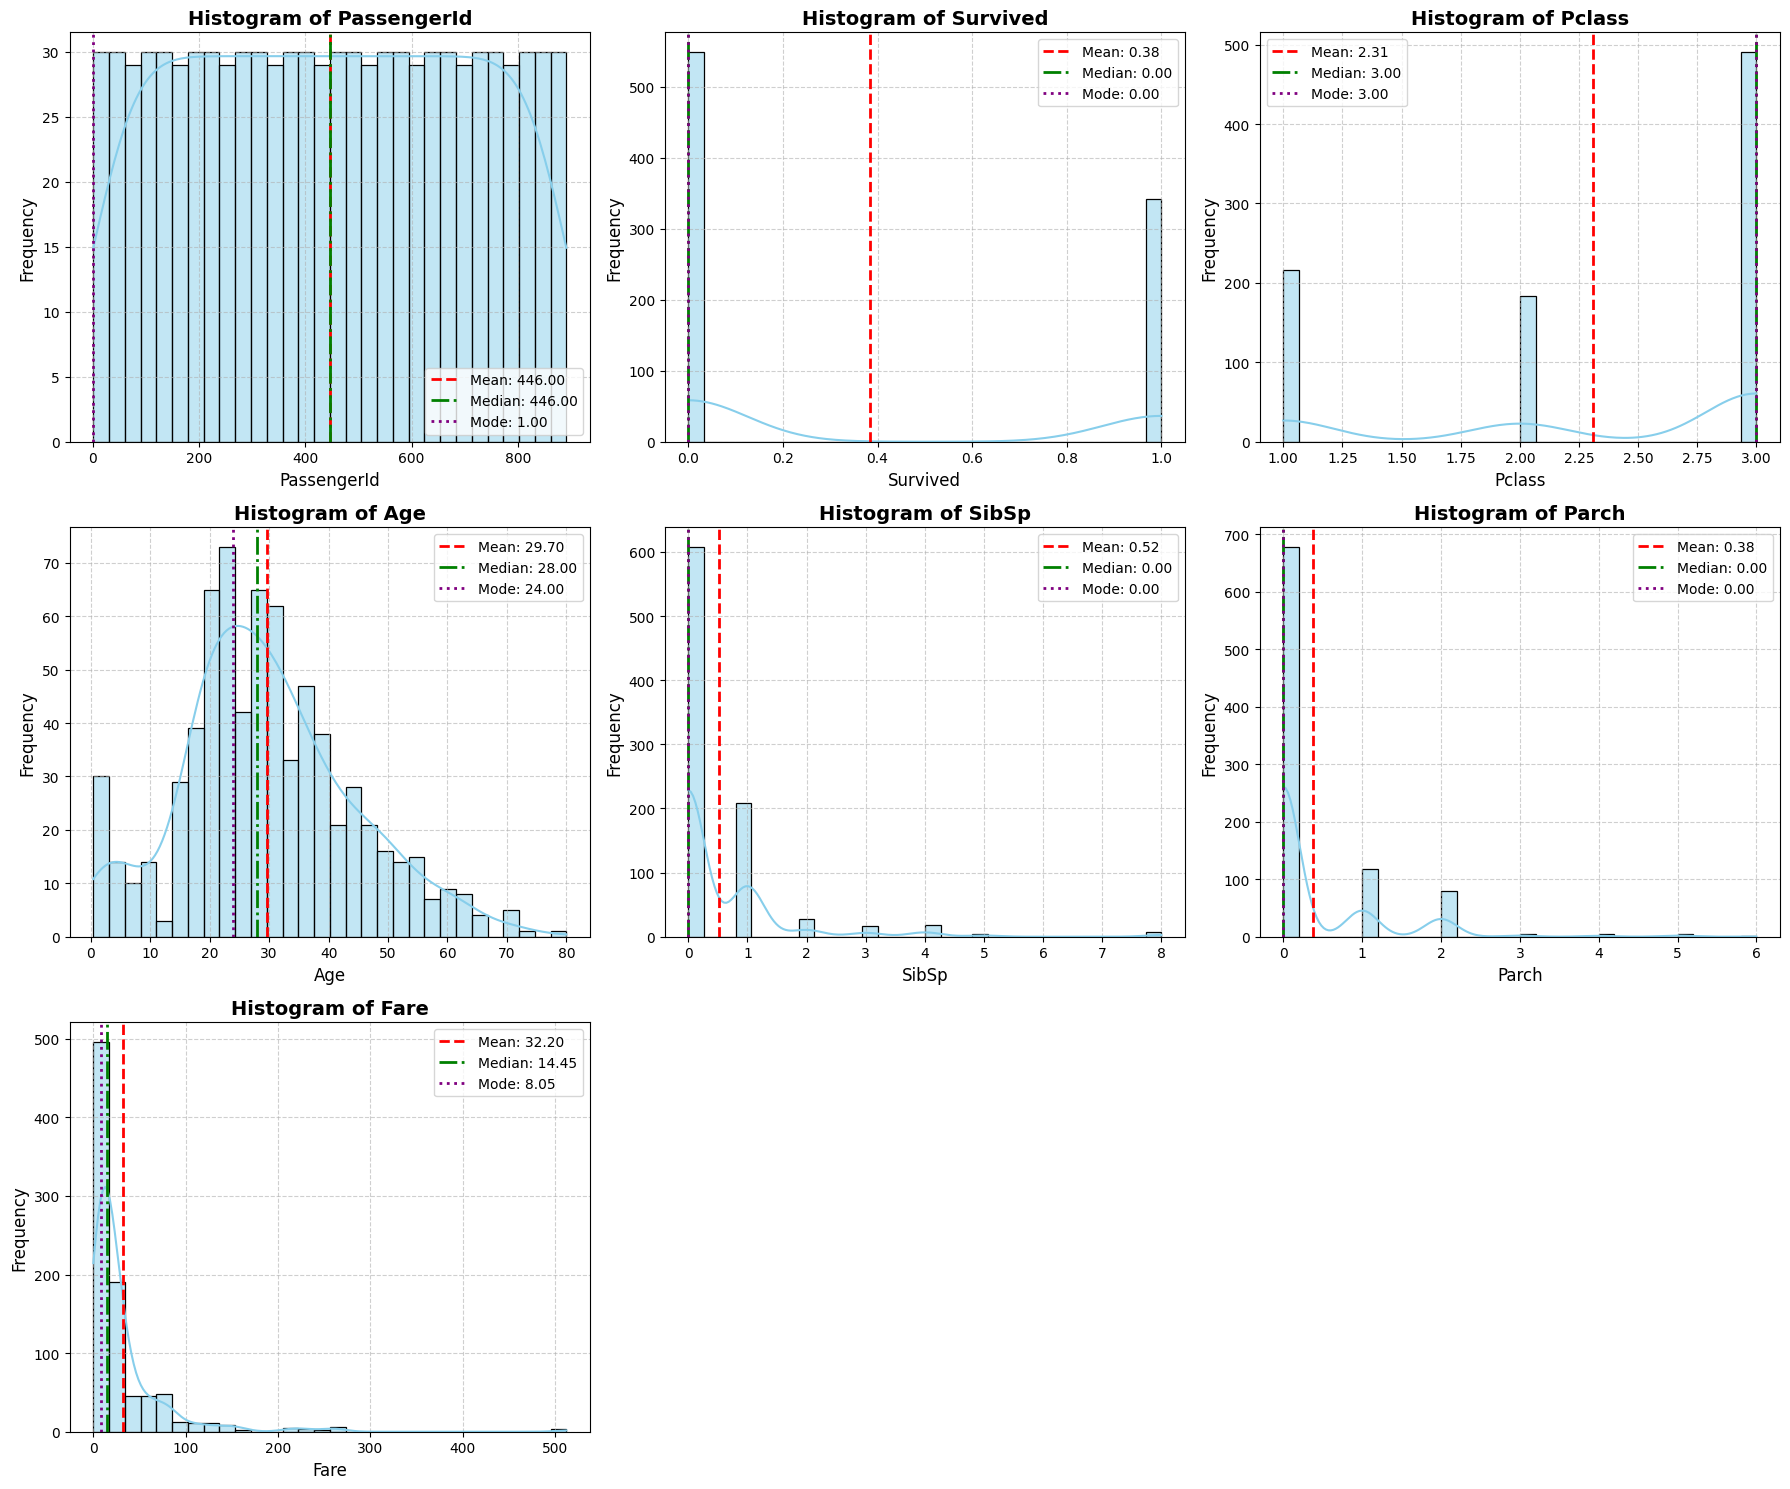

In [95]:
plot_uni_numeric_histograms(df_num)

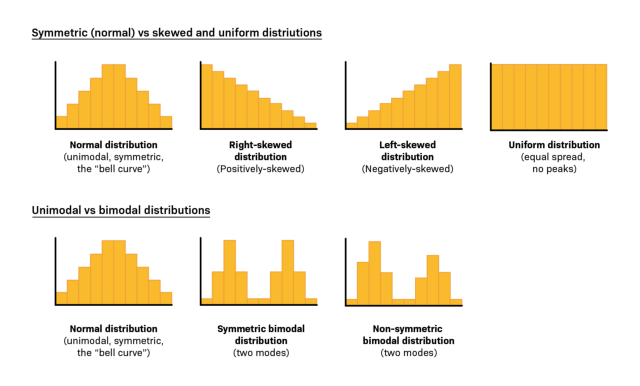

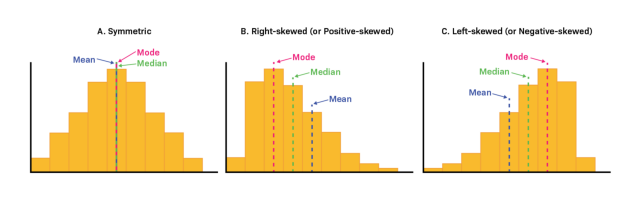

In [65]:
#How to read histogram plots
show_png("/content/drive/MyDrive/ML Projects/Data/histogram.png");
show_png("/content/drive/MyDrive/ML Projects/Data/histogram 2.png");

In [96]:
def plot_uni_numeric_violin(df: pd.DataFrame, columns: list[str] | None = None):
    """
    Creates violin plots (boxplot + KDE curve) for each numeric column in subplots.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    columns : list[str] | None
        Columns to plot. If None, auto-detect numeric columns.
    """
    # Detect numeric columns
    if columns is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        numeric_cols = [c for c in columns if c in df.columns and np.issubdtype(df[c].dtype, np.number)]

    if not numeric_cols:
        print("⚠️ No numeric columns found to plot.")
        return

    n_cols = len(numeric_cols)
    n_rows = math.ceil(n_cols / 3)  # up to 3 per row for readability

    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.violinplot(y=df[col], ax=axes[i], inner="box", cut=0, color="skyblue")
        axes[i].set_title(f"Violin Plot — {col}", fontsize=14, fontweight="bold")
        axes[i].set_xlabel("")
        axes[i].set_ylabel(col)
        axes[i].grid(True, linestyle="--", alpha=0.5)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

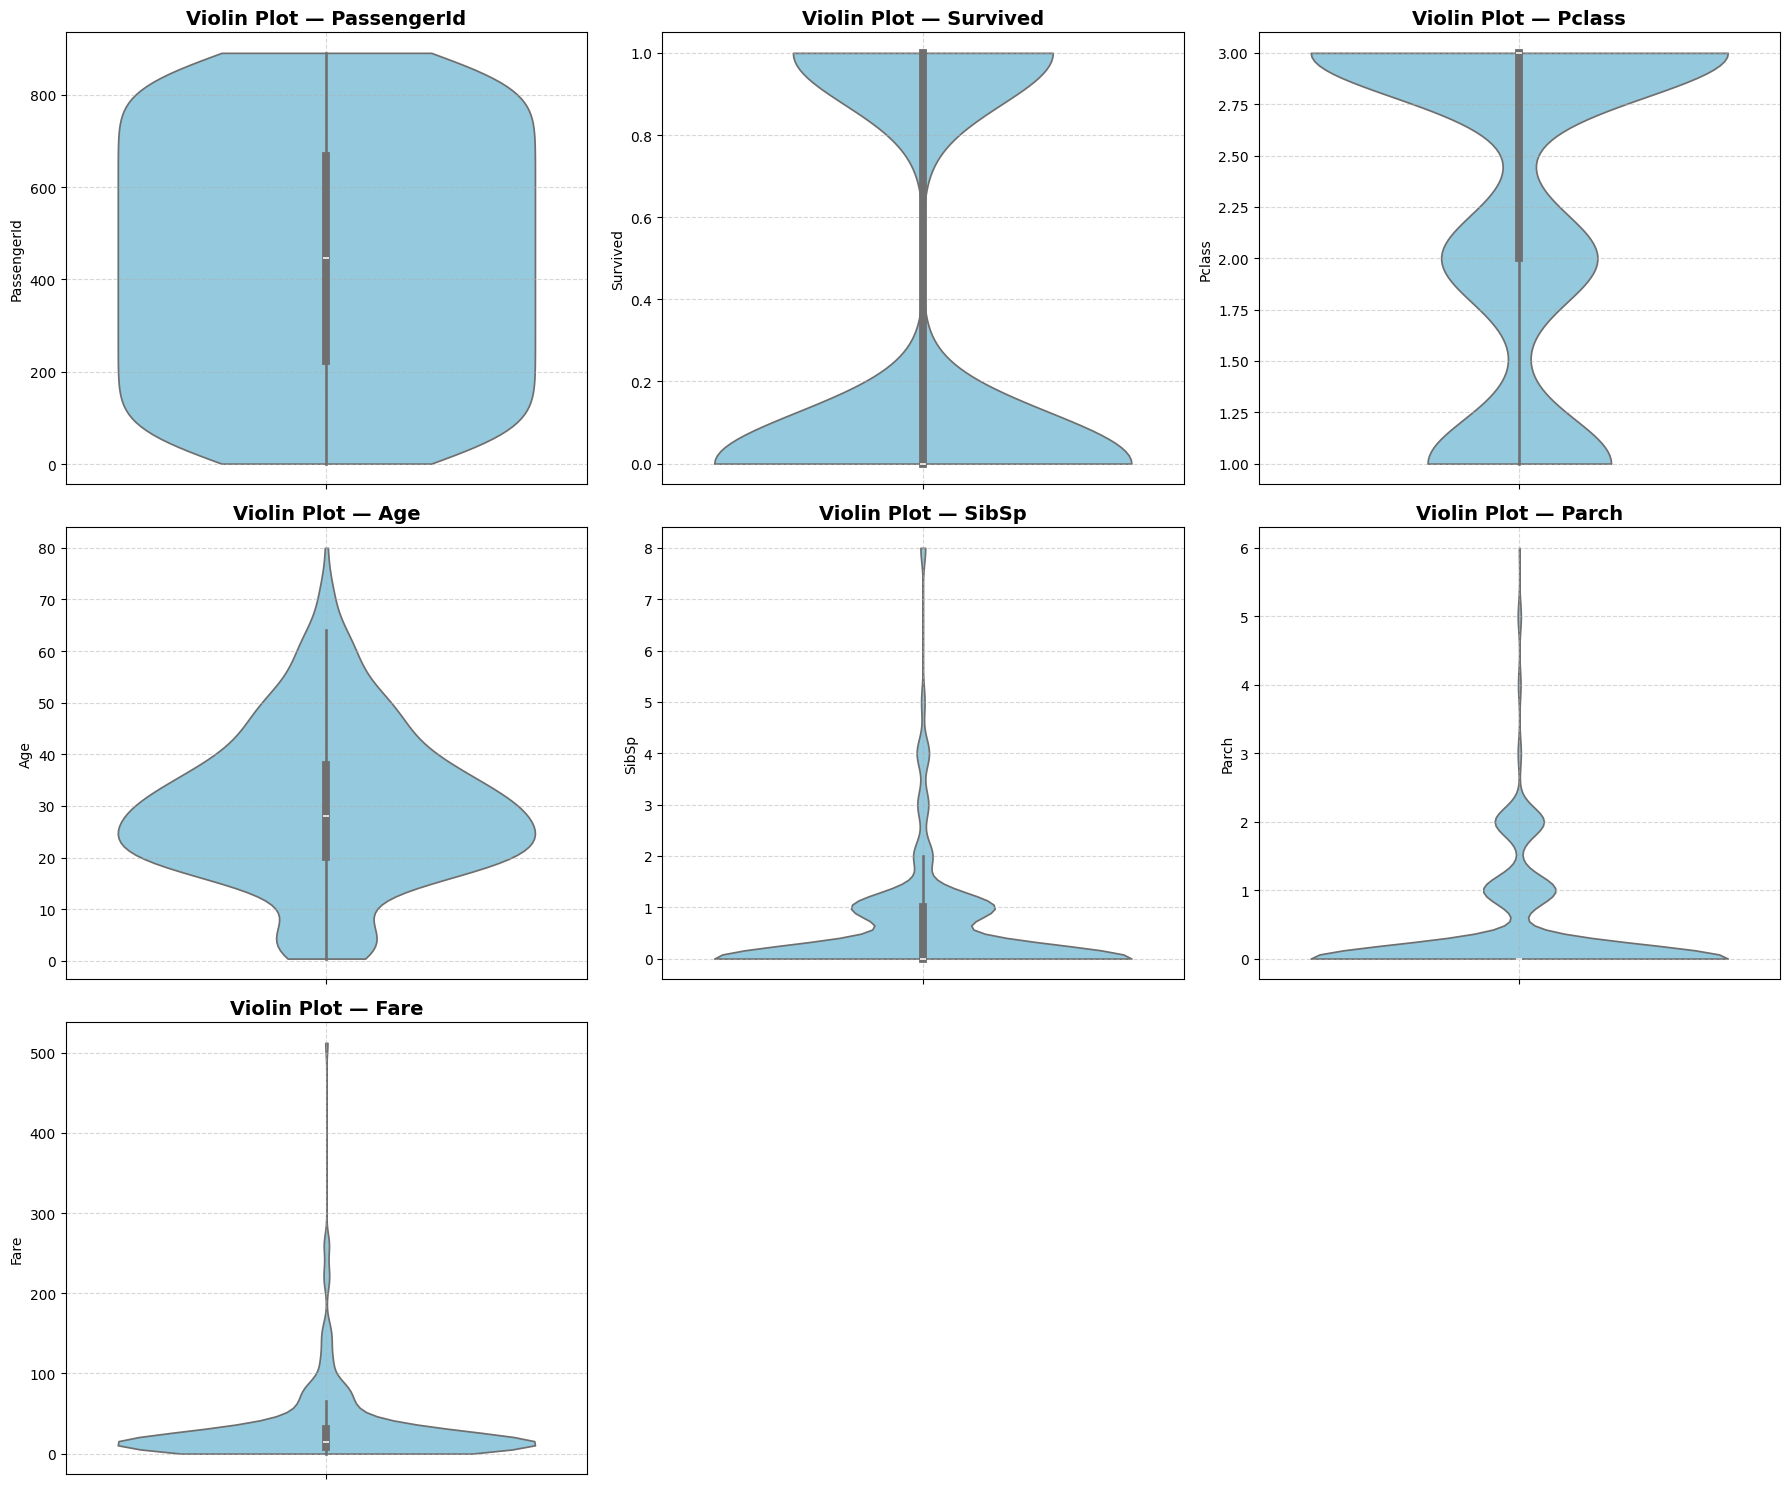

In [97]:
plot_uni_numeric_violin(df)

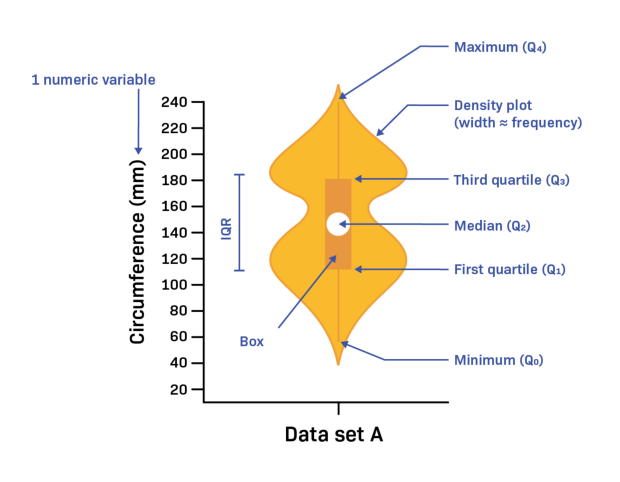

In [64]:
#how to read Violin Plots
show_png("/content/drive/MyDrive/ML Projects/Data/violin-plot.png")

In [98]:
def plot_uni_categorical_counts(cat_df):
    """
    Interactive frequency-plot app for categorical columns.
    - Lets you choose the maximum allowed unique categories per column (max_unique).
    - Lets you choose the bar color with friendly names.
    - Skips columns with unique values > max_unique (prints which are skipped).
    - Uses horizontal bars for readability.

    Parameters
    ----------
    cat_df : pandas.DataFrame
        A DataFrame containing only categorical/object/bool columns.
    """
    # --- Controls ---
    max_unique_w = widgets.IntSlider(
        value=20, min=2, max=100, step=1,
        description='Max unique', style={'description_width': '120px'}
    )
    max_unique_desc = widgets.HTML(
        "<b>Max unique:</b> Maximum allowed unique categories per column.<br>"
        "Columns with more unique values than this will be skipped."
    )

    color_options = {
        "Blue (C0)": "C0",
        "Orange (C1)": "C1",
        "Green (C2)": "C2",
        "Red (C3)": "C3",
        "Purple (C4)": "C4",
        "Brown (C5)": "C5",
        "Pink (C6)": "C6",
        "Gray (C7)": "C7",
        "Olive (C8)": "C8",
        "Cyan (C9)": "C9",
        "Black": "black"
    }
    color_w = widgets.Dropdown(
        options=color_options, value="C0",
        description="Bar color", style={'description_width': '120px'}
    )
    color_desc = widgets.HTML(
        "<b>Bar color:</b> Color used for the bars in the charts."
    )

    btn = widgets.Button(description='Plot', button_style='primary')
    out = widgets.Output()

    # --- Plotting logic (inner function) ---
    def _plot(max_unique, color):
        clear_output(wait=True)
        display(ui_box)  # keep the UI visible above the output

        if cat_df.empty:
            print("⚠️ No categorical columns to plot.")
            return

        # Filter eligible columns by uniqueness threshold
        eligible_cols, skipped = [], []
        for col in cat_df.columns:
            u = cat_df[col].nunique(dropna=False)
            if u <= max_unique:
                eligible_cols.append(col)
            else:
                skipped.append((col, u))

        if skipped:
            for col, u in skipped:
                print(f"⏭️ Skipping '{col}' — {u} unique values (> {max_unique}).")

        if not eligible_cols:
            print("ℹ️ No categorical columns met the max_unique threshold to plot.")
            return

        n_cols = len(eligible_cols)
        n_rows = math.ceil(n_cols / 3)  # up to 3 plots per row for readability

        plt.figure(figsize=(18, 5 * n_rows))
        plot_idx = 1

        for col in eligible_cols:
            data = cat_df[col].fillna("NaN")
            counts = data.value_counts(dropna=False)

            ax = plt.subplot(n_rows, 3, plot_idx)
            sns.barplot(x=counts.values, y=counts.index, color=color, ax=ax)
            ax.set_title(f"Frequency of {col}", fontsize=14, fontweight="bold")
            ax.set_xlabel("Count", fontsize=12)
            ax.set_ylabel(col, fontsize=12)
            ax.grid(True, axis="x", linestyle="--", alpha=0.6)

            # annotate counts at bar ends
            for y, v in enumerate(counts.values):
                ax.text(v, y, f" {v}", va="center", ha="left", fontsize=9)

            plot_idx += 1

        plt.tight_layout()
        plt.show()

    # --- Wire button ---
    def on_click(_):
        _plot(max_unique_w.value, color_w.value)

    btn.on_click(on_click)

    # --- Layout / display ---
    ui_box = widgets.VBox([
        max_unique_w, max_unique_desc,
        color_w, color_desc,
        btn, out
    ])
    display(ui_box)


⏭️ Skipping 'Name' — 891 unique values (> 20).
⏭️ Skipping 'Ticket' — 681 unique values (> 20).
⏭️ Skipping 'Cabin' — 148 unique values (> 20).


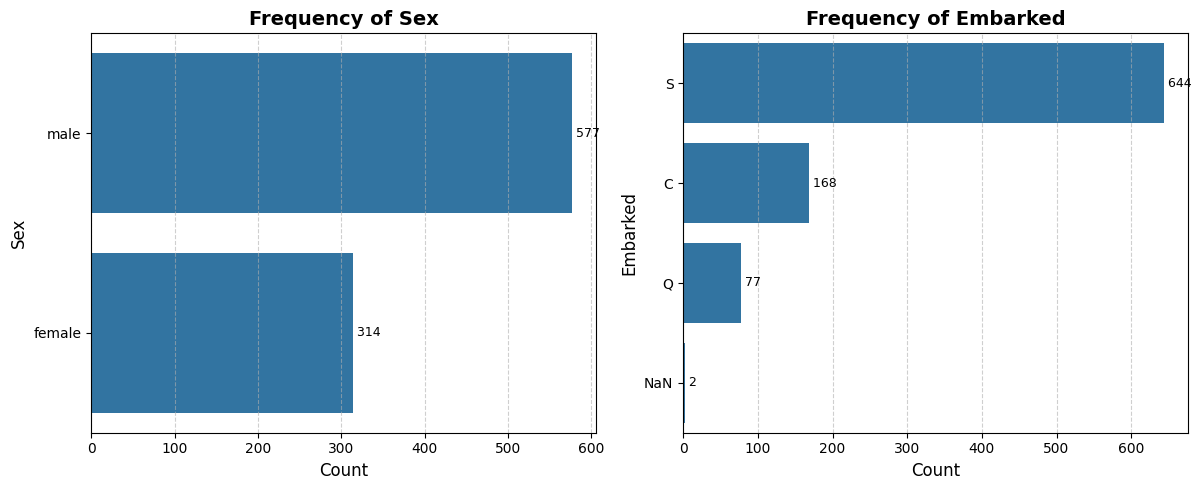

In [99]:
plot_uni_categorical_counts(df_cat)

## Bivariate Analysis (Feature vs Target)

I then explore how each feature relates to the target variable.

- For numeric vs target (classification): compare means/medians across target groups, visualize with boxplots or violin plots.

- For categorical vs target: cross-tabulations and survival/response rates per category.

- For regression problems: scatter plots and correlation with the target.

Example insight (generic):

>Customers in category A may have twice the probability of a positive outcome compared to category B.

In [113]:
def plot_bi_numeric_boxplots(num_df, target_col, df):
    """
    Creates subplots of boxplots for each numeric column against the target column.

    Parameters
    ----------
    num_df : pandas.DataFrame
        DataFrame with only numerical columns
    target_col : str
        Name of the target column (must exist in df)
    df : pandas.DataFrame
        Original DataFrame containing both numeric and target columns
    """
    if num_df.empty:
        print("⚠️ No numerical columns to plot.")
        return

    if target_col not in df.columns:
        print(f"❌ Target column '{target_col}' not found in DataFrame.")
        return

    # Drop target column if it's in the numeric list
    plot_cols = [col for col in num_df.columns if col != target_col]
    if not plot_cols:
        print("ℹ️ No numeric features to plot against the target.")
        return

    n_cols = len(plot_cols)
    n_rows = math.ceil(n_cols / 3)  # up to 3 plots per row

    plt.figure(figsize=(18, 5 * n_rows))

    for i, col in enumerate(plot_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.boxplot(
            x=df[target_col],
            y=df[col],
            hue=df[target_col],   # tie palette to target to avoid warnings
            palette="Set2",
            legend=False
        )

        plt.title(f"{col} vs {target_col}", fontsize=14, fontweight="bold")
        plt.xlabel(target_col, fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.grid(True, axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

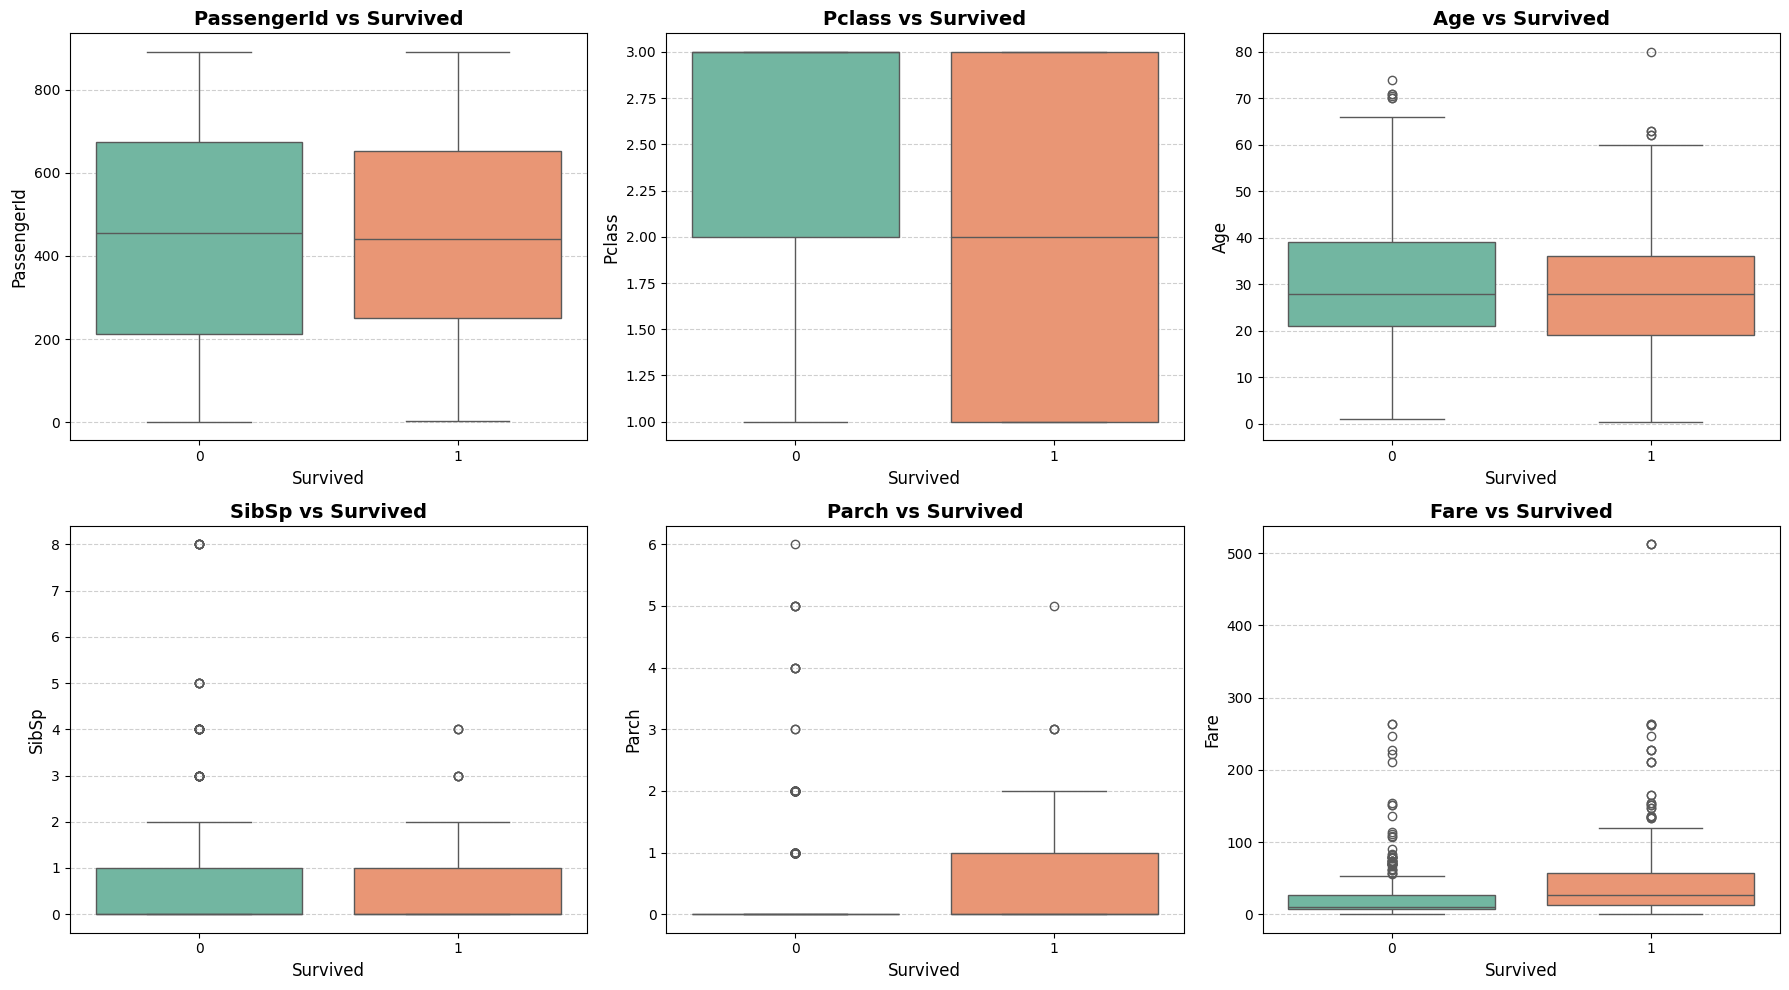

In [114]:
plot_bi_numeric_boxplots(df_num, "Survived", df)


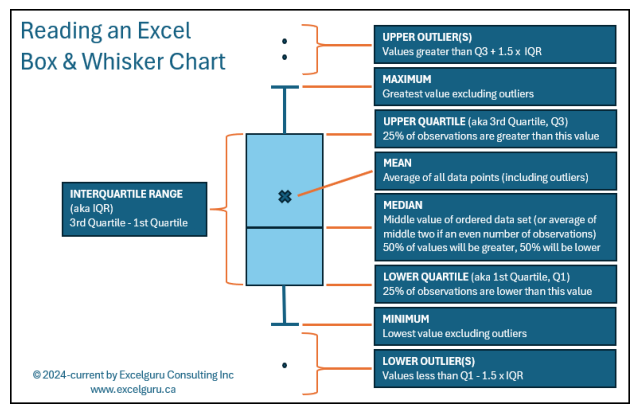

In [115]:
show_png("/content/drive/MyDrive/ML Projects/Data/boxplot.png")

In [132]:
def plot_bi_categorical_target_counts(cat_df: pd.DataFrame,
                               target_col: str,
                               df: pd.DataFrame,
                               max_unique: int = 20,
                               normalize: bool = False,
                               cmap: str = "tab10"):
    """
    For each categorical column, draw grouped bar charts showing the distribution
    of target classes within each category.

    Parameters
    ----------
    cat_df : pd.DataFrame
        DataFrame with only categorical/object/bool columns
    target_col : str
        Name of the target column in df
    df : pd.DataFrame
        Full DataFrame with both categorical columns and target column
    max_unique : int, default 20
        Skip columns with more than this many unique categories
    normalize : bool, default False
        If True, plot row percentages (each category sums to 100%)
        If False, plot raw counts
    cmap : str, default "tab10"
        Matplotlib colormap for target classes
    """
    if cat_df.empty:
        print("⚠️ No categorical columns to analyze.")
        return
    if target_col not in df.columns:
        print(f"❌ Target column '{target_col}' not found in DataFrame.")
        return

    # Get unique target classes
    target_classes = sorted(df[target_col].dropna().unique())
    n_classes = len(target_classes)
    if n_classes < 2:
        print(f"⚠️ Target '{target_col}' has less than 2 unique values.")
        return

    # Eligible categorical columns
    eligible_cols = [c for c in cat_df.columns if cat_df[c].nunique(dropna=False) <= max_unique]
    skipped = [c for c in cat_df.columns if c not in eligible_cols]
    for c in skipped:
        print(f"⏭️ Skipping '{c}' — too many unique values.")

    if not eligible_cols:
        print("ℹ️ No categorical columns eligible to plot.")
        return

    # Grid layout
    n_plots = len(eligible_cols)
    n_rows = math.ceil(n_plots / 3)
    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
    axes = np.atleast_1d(axes).ravel()

    cmap_obj = plt.get_cmap(cmap)
    colors = [cmap_obj(i % cmap_obj.N) for i in range(n_classes)]

    for i, col in enumerate(eligible_cols):
        ax = axes[i]

        # Crosstab
        ct = pd.crosstab(df[col].fillna("NaN"), df[target_col], dropna=False)
        if normalize:
            ct = ct.div(ct.sum(axis=1), axis=0) * 100

        categories = ct.index.tolist()
        x = np.arange(len(categories))
        width = 0.8 / n_classes  # width per bar

        for j, cls in enumerate(target_classes):
            vals = ct[cls].values if cls in ct else np.zeros(len(categories))
            ax.bar(x + j * width, vals, width=width, color=colors[j], label=str(cls))

        ax.set_xticks(x + (n_classes-1)/2 * width)
        ax.set_xticklabels(categories, rotation=0, ha="right")
        ax.set_title(f"{col} × {target_col}", fontsize=14, fontweight="bold")
        ax.set_ylabel("Percent (%)" if normalize else "Count")
        ax.grid(True, axis="y", linestyle="--", alpha=0.6)

        if i % 3 == 0:  # legend on first col in each row
            ax.legend(title=target_col, frameon=False)

    # hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


⏭️ Skipping 'Name' — too many unique values.
⏭️ Skipping 'Ticket' — too many unique values.
⏭️ Skipping 'Cabin' — too many unique values.


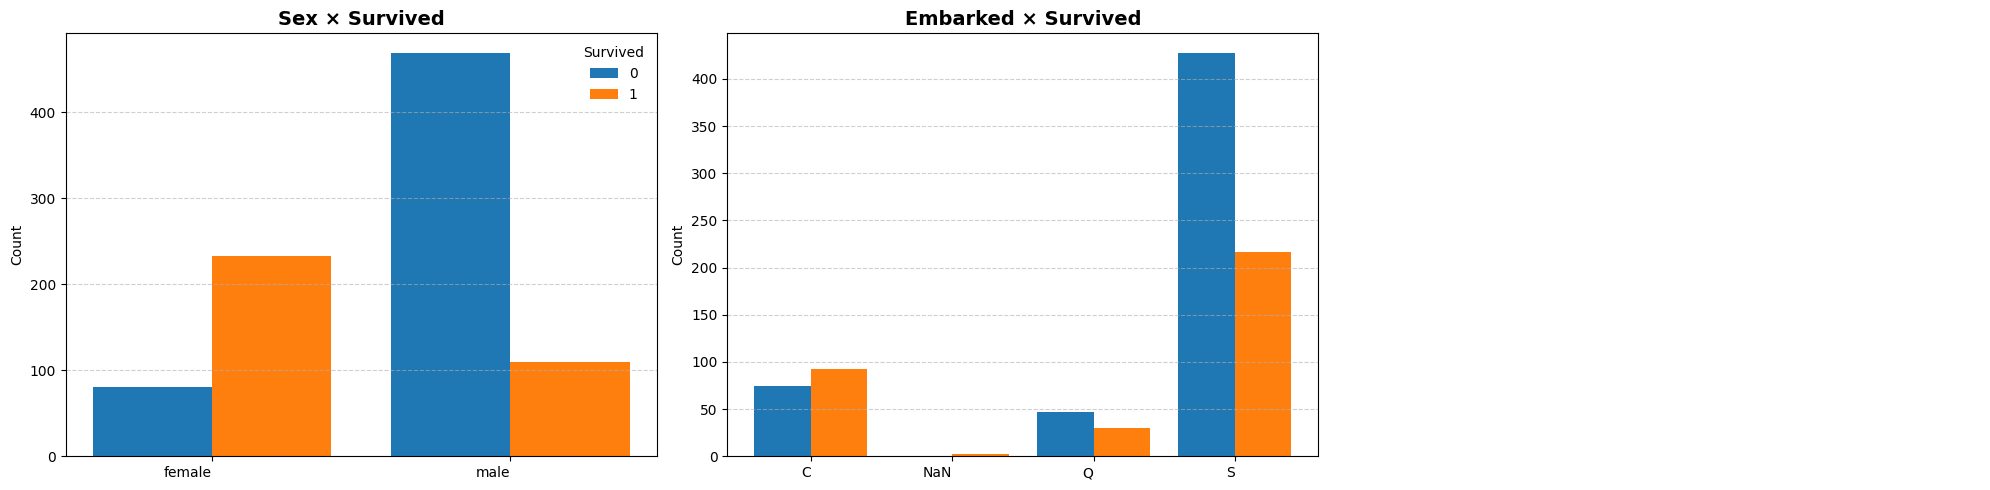

In [133]:
plot_bi_categorical_target_counts(df_cat, "Survived", df)

In [120]:
def plot_bi_categorical_target_rates(cat_df: pd.DataFrame,
                             target_col: str,
                             df: pd.DataFrame,
                             max_unique: int = 20,
                             min_count: int = 1,
                             sort_by: str = "rate_desc"):
    """
    Bivariate analysis for categorical features vs a (binary) target.
    For each eligible categorical column:
      - Computes count and response rate (mean of target) per category
      - Plots a horizontal bar chart of response rate (%) with counts annotated

    Parameters
    ----------
    cat_df : pd.DataFrame
        DataFrame containing only categorical/object/bool columns.
    target_col : str
        Name of the target column in `df`. Expected to be binary (two unique values).
    df : pd.DataFrame
        Original DataFrame containing both categorical features and the target.
    max_unique : int, default=20
        Skip plotting columns with more than this many unique categories (incl. NaN).
    min_count : int, default=1
        Minimum category count required to be plotted (filters very rare levels).
    sort_by : {"rate_desc", "count_desc", "alpha"}, default="rate_desc"
        Sort categories within each plot by response rate desc, count desc, or alphabetically.
    """
    # Basic validations
    if cat_df.empty:
        print("⚠️ No categorical columns to analyze.")
        return
    if target_col not in df.columns:
        print(f"❌ Target column '{target_col}' not found in DataFrame.")
        return

    # Check target is binary (two unique values)
    target_unique = pd.Series(df[target_col].dropna().unique())
    if target_unique.nunique() != 2:
        print(f"⚠️ Target '{target_col}' is not binary (found {target_unique.nunique()} unique values). "
              f"This function expects a binary target. Proceeding but 'rate' may be ambiguous.")
    # Convert target to numeric if it's boolean/strings like "yes/no"
    # We'll try best-effort: if exactly two unique values and not numeric 0/1, map to 0/1.
    if not np.issubdtype(df[target_col].dtype, np.number) and target_unique.nunique() == 2:
        val0, val1 = sorted(target_unique.astype(str))[:2]
        mapping = {val0: 0, val1: 1}
        target_series = df[target_col].astype(str).map(mapping)
    else:
        target_series = pd.to_numeric(df[target_col], errors="coerce")

    # Build eligible categorical columns
    eligible_cols, skipped = [], []
    for col in cat_df.columns:
        u = cat_df[col].nunique(dropna=False)
        if u <= max_unique:
            eligible_cols.append(col)
        else:
            skipped.append((col, u))

    for col, u in skipped:
        print(f"⏭️ Skipping '{col}' — {u} unique values (> {max_unique}).")
    if not eligible_cols:
        print("ℹ️ No categorical columns met the max_unique threshold to plot.")
        return

    # Layout: up to 3 plots per row
    n_plots = len(eligible_cols)
    n_rows = math.ceil(n_plots / 3)
    plt.figure(figsize=(18, 5 * n_rows))

    for i, col in enumerate(eligible_cols, 1):
        # Prepare data
        tmp = pd.DataFrame({
            col: cat_df[col].fillna("NaN"),
            target_col: target_series
        })
        # Group by category
        agg = tmp.groupby(col, dropna=False)[target_col].agg(count="count", rate="mean").reset_index()
        # Filter small categories
        agg = agg[agg["count"] >= min_count].copy()

        # Sorting
        if sort_by == "count_desc":
            agg = agg.sort_values("count", ascending=False)
        elif sort_by == "alpha":
            agg = agg.sort_values(col.astype(str), ascending=True)
        else:  # "rate_desc"
            agg = agg.sort_values("rate", ascending=False)

        # Plot: response rate (%)
        ax = plt.subplot(n_rows, 3, i)
        y_labels = agg[col].astype(str)
        rates_pct = (agg["rate"] * 100).round(2)

        ax.barh(y_labels, rates_pct, color="C0")
        ax.invert_yaxis()  # highest at top
        ax.set_xlabel("Response rate (%)")
        ax.set_ylabel(col)
        ax.set_title(f"{col} → {target_col} rate", fontsize=14, fontweight="bold")
        ax.grid(True, axis="x", linestyle="--", alpha=0.6)
        ax.set_xlim(0, 100)

        # Annotate counts at the end of bars: e.g., (n=123)
        for y, (rate, cnt) in enumerate(zip(rates_pct, agg["count"].values)):
            ax.text(rate + 1, y, f"(n={cnt})", va="center", ha="left", fontsize=9)

    plt.tight_layout()
    plt.show()

⏭️ Skipping 'Name' — 891 unique values (> 20).
⏭️ Skipping 'Ticket' — 681 unique values (> 20).
⏭️ Skipping 'Cabin' — 148 unique values (> 20).


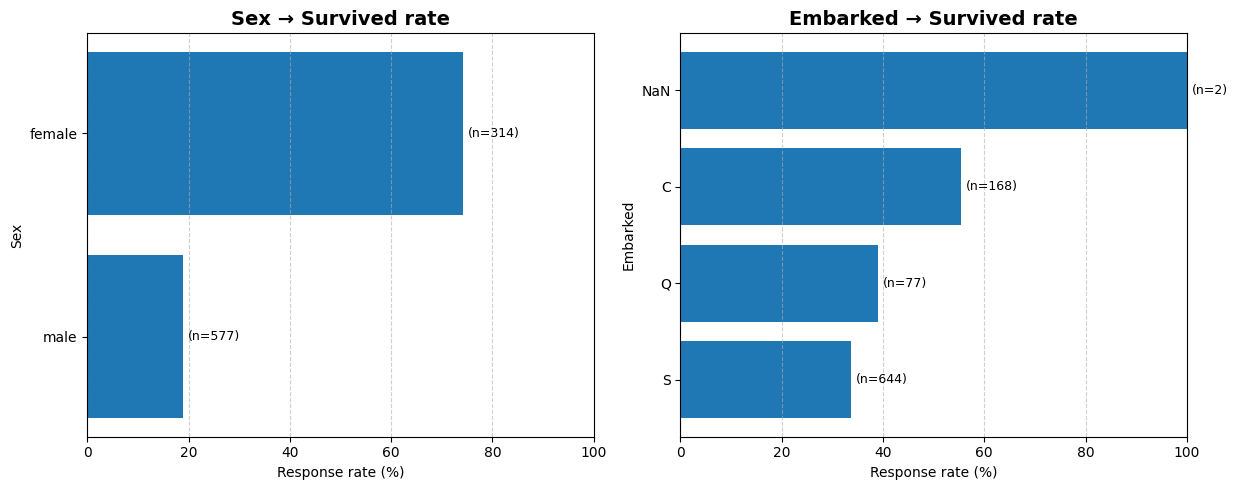

In [121]:
plot_bi_categorical_target_rates(df_cat,"Survived",df)

## Multivariate Analysis (Feature Interactions)

Some insights only appear when looking at multiple variables together:

- Numeric vs numeric (scatter plots, correlation heatmaps).

- Categorical vs categorical (stacked bar charts, grouped proportions).

- Mixed feature interactions (e.g., does feature A matter differently depending on feature B?).

>This helps me identify synergies or collinearity between variables.

## Correlation & Redundancy Check

For numeric variables, I check correlations:

- High correlation (e.g., >0.9): indicates redundancy, I may drop one later.

- Low correlation with target: doesn’t mean the feature is useless, but it sets expectations.

- Multicollinearity: if many variables are correlated, I note this for modeling (especially linear models).

## Outliers & Anomalies

I look for unusual cases that may distort models:

- Extreme numeric values (e.g., income = 1e9).

- Invalid categories (e.g., “???” or misspellings).

- Dates far outside expected ranges.

My decision:

- Keep them (if real but rare events).

- Transform them (e.g., log scale).

- Remove them (if clear errors).

## First Hypotheses

Based on EDA, I start forming early hypotheses about which features matter most.

- Which features seem strongly linked to the target?

- Which categories show big differences in outcome rates?

- Which features appear noisy or irrelevant?

I write these down so I can later compare my intuition vs actual model results.

## My EDA Checklist

 - ✅ Reviewed distributions for all numeric features

 - ✅ Checked frequency tables for categorical features

 - ⬜️ Compared features against the target variable

 - ⬜️ Explored multivariate patterns and interactions

 - ⬜️ Logged correlations and possible redundancies

 - ⬜️ Investigated outliers and anomalies

 - ⬜️ Wrote down initial hypotheses

# Step 5: Data Cleaning & Preprocessing

**Why I Am Doing This**

After exploring the dataset, I now need to make it consistent, reliable, and usable for machine learning.
Even the best model will fail if the input data is messy.

The purpose of this step is to:

- Handle missing values

- Fix data type issues

- Resolve duplicates

- Correct or transform outliers

- Standardize formats (dates, text, categories)

- Ensure there is no data leakage

>I think of this step as building a “clean kitchen” before cooking: I want my ingredients (data) organized and ready.

## Handling Missing Values

I first check where data is missing and decide how to treat it:

- Drop rows or columns (only if missingness is very high and uninformative).

- Fill with statistical values:

   - Numeric → mean, median, or group-based median

   - Categorical → mode (most frequent value)

- Use domain-specific rules (e.g., missing = “Unknown” or “Not applicable”).

- Create missingness indicators (binary flags for whether data was missing).

>I remind myself: imputing is never perfect — I choose a strategy that balances simplicity with accuracy.

## Data Type Corrections

make sure each column has the correct type:

- IDs → integer or string, not float

- Dates → converted to proper datetime objects

- Categories → set as categorical variables

- Numeric columns → checked for parsing errors (e.g., “1,000” stored as string)

## Removing Duplicates

I check if:

- Any rows are exact duplicates → remove them.

- Keys (like ID) are duplicated → investigate why (data error or valid multi-records).

## Handling Outliers

Outliers can distort models, so I decide whether to:

- Keep them (if they are valid but rare events).

- Cap them (winsorization: set extreme values to a threshold).

- Transform them (e.g., log-scaling skewed data).

- Drop them (if they are clear errors).

## Standardizing Date/Time Features

For datetime columns, I:

- Convert to proper datetime format.

- Extract useful parts (year, month, day, weekday, hour).

- Calculate differences (e.g., time since event, days until deadline).

- Align time zones if necessary.

## Text & String Cleaning

For text columns, I consider:

- Stripping whitespace, correcting casing.

- Removing special characters or formatting artifacts.

- Standardizing categories (e.g., “male” vs “Male” vs “M”).

- Handling high-cardinality text separately (embedding, NLP later if relevant).

## Scaling & Normalization (Optional at This Stage)

For numeric features, I may prepare them for modeling:

- Standardization (z-score): center at mean = 0, std = 1.

- Normalization (min-max): scale to range [0,1].

- Log transform: reduce skew for highly right-skewed features.

>Some algorithms (e.g., Logistic Regression, SVM, Neural Nets) are sensitive to scale; others (e.g., Decision Trees, Random Forests) are not

## Preventing Data Leakage

I make sure that:

- Test/validation sets never use information from training data.

- Future information is not included in features for past predictions.

- Derived features are calculated consistently across train/test splits.

## My Data Cleaning Checklist

 - ✅ Identified and handled missing values

 - ⬜️ Verified column data types

 - ⬜️ Checked and removed duplicates

 - ⬜️ Investigated and treated outliers

 - ⬜️ Standardized date/time columns

 - ⬜️ Cleaned text and categorical values

 - ⬜️ Applied scaling/normalization if needed

 - ⬜️ Checked for potential data leakage

# Step 6: Feature Engineering

**Why I Am Doing This**

Once the dataset is clean, I want to enrich it by creating new features that capture important patterns.
Sometimes, the raw data alone doesn’t tell the full story — but engineered features can reveal hidden relationships.

Feature engineering often makes the difference between a baseline model and a high-performing model.

>Models are only as good as the features they’re fed. Feature engineering is my chance to inject domain knowledge into the dataset.

## Types of Feature Engineering

I think of feature engineering in several categories:

1. **Numeric Transformations**

- Log-transform skewed variables (e.g., income, transaction amounts).

- Binning continuous variables into categories (e.g., age groups).

- Ratios and percentages (e.g., feature_a / feature_b).

- Polynomial or interaction terms (e.g., feature_a * feature_b).

2. **Categorical Encoding**

- One-hot encoding: convert categories into dummy variables.

- Label encoding: assign integers (useful for ordinal data).

- Frequency encoding: replace categories with their frequency count.

- Grouping rare categories: combine small classes into “Other.”

3. **Datetime Features**

From a single timestamp, I can extract:

- Year, month, day, weekday, quarter.

- Hour of the day (for time-of-day effects).

- Time differences (e.g., days since signup, days until expiration).

- Seasonality flags (holiday, weekend, summer vs winter).

4. **Text Features**

If I have free-text columns:

- Length of the text (number of words, characters).

- Presence of certain keywords.

- Bag-of-words or embeddings (if NLP is relevant).

5. **Domain-Specific Features**

Depending on the dataset context, I may create:

- Risk scores (e.g., credit risk ratio).

- Aggregates (e.g., average purchases per customer).

- Flags (e.g., “is_high_value_customer” = 1 if spend > threshold).

>The best features often come from domain knowledge, not just automatic transformations.

## Feature Selection vs Feature Creation

Feature engineering is not only about adding new features — it’s also about deciding which features to keep.

- Drop irrelevant or redundant features (e.g., unique IDs, duplicates).

- Remove highly correlated features to reduce multicollinearity.

- Keep features that improve interpretability or model stability.

## Interaction Features

Sometimes, two variables combined give more insight than separately.

- *Example*: `price` * `quantity` = total_spent.

- *Example*: `age_group` + `product_type` → segment performance.

I always document these combinations so I remember why I created them.

## Handling High Cardinality

If a categorical column has hundreds of categories (e.g., cities, product IDs), I plan carefully:

- Group rare values into “Other.”

- Use frequency encoding.

- Consider embeddings for extremely large cardinality.

## Derived Features Log (Template)

| New Feature  | Formula / Transformation             | Rationale                                          |
| ------------ | ------------------------------------ | -------------------------------------------------- |
| income\_log  | log(income + 1)                      | Reduce skew and highlight relative differences     |
| age\_group   | bin(age) → {0–18, 19–35, 36–60, 61+} | Easier interpretation, capture non-linear patterns |
| days\_active | today – signup\_date                 | Measure customer lifetime                          |
| ratio\_ab    | feature\_a / feature\_b              | Highlight proportional relationship                |


## My Feature Engineering Checklist

 - ✅ Created transformations for skewed numeric variables

 - ⬜️ Extracted useful datetime components

 - ⬜️ Encoded categorical features (one-hot, label, or frequency)

 - ⬜️ Grouped or flagged rare categories

 - ⬜️ Designed domain-specific variables

 - ⬜️ Logged all new features in a feature dictionary

# Step 7: Feature Transformation & Data Splitting

**Why I Am Doing This**

Even after cleaning and engineering features, the dataset may still not be ready for modeling.
Models often expect features in specific formats, and I also need to ensure that I evaluate my model fairly with proper train/test/validation splits.

- The purpose of this step is to:

- Transform categorical and numeric features into usable formats.

- Scale variables where needed.

- Encode labels for supervised learning tasks.

- Split the dataset into training, validation, and test sets without leakage.

>At this stage, I am building the bridge between raw/engineered data and the algorithms that will learn from it.

## Encoding Categorical Variables

Different algorithms require categorical features in numeric form.

- One-Hot Encoding (OHE):

   - Each category becomes its own column (0/1 flag).

   - Best for tree-based models (Decision Trees, Random Forests, XGBoost).

   - Problem: high-dimensionality if too many categories.

- Label Encoding:

   - Assigns an integer value to each category.

   - Works well with ordinal features (e.g., “low, medium, high”).

   - Risk: for non-ordinal features, models may assume false order.

- Frequency/Count Encoding:

   - Replace categories with their frequency or counts.

   - Useful for high-cardinality variables.

- Target/Mean Encoding:

   - Replace categories with average target rate.

   - Can be powerful, but risky (must avoid leakage).

## Scaling Numeric Features

Some algorithms are sensitive to feature scales (e.g., Logistic Regression, SVM, Neural Networks).
Others (tree-based models) are scale-invariant.

- Standardization (Z-score): `(x – mean) / std` → mean = 0, std = 1.

- Normalization (Min-Max): scales values into `[0,1]`.

- Log Transform: reduces skew in highly right-skewed features.

## Encoding the Target Variable

- For binary classification: encode target as {0,1}.

- For multi-class classification: integer labels or one-hot vectors.

- For regression: keep as continuous numeric values.

## Train / Validation / Test Splitting

To properly evaluate performance, I split my dataset into subsets:

- Training set: the portion used to train the model (usually 60–70%).

- Validation set: used to tune hyperparameters and compare models (15–20%).

- Test set: final unseen data to evaluate real-world performance (15–20%).

### Important considerations

- Use stratified sampling for classification if classes are imbalanced.

- For time-series problems, split chronologically (train on past, test on future).

- Ensure no data leakage (the same person/item/event shouldn’t appear in both train and test).

## Cross-Validation (Optional but Recommended)

Instead of one validation split, I may use k-fold cross-validation:

- The training data is split into k folds (e.g., 5).

- The model trains k times, each time using one fold as validation and the rest as training.

- The average score across folds gives a more reliable estimate.

>This is especially useful for small datasets where I want to maximize training data.

## My Transformation & Splitting Checklist

 - ✅ Encoded categorical variables properly

 - ✅ Scaled/normalized numeric features if required

 - ⬜️ Encoded the target variable consistently

 - ⬜️ Split dataset into train/validation/test

 - ⬜️ Used stratification or time-based splits if needed

 - ⬜️ Considered cross-validation for stability

 - ⬜️ Verified no data leakage between splits

# Step 8: Model Selection & Baseline Modeling

**Why I Am Doing This**

Now that my dataset is clean, engineered, and split, I need to select candidate models to try.
The purpose of this step is twofold:

1. Establish a baseline model to measure progress against.

2. Compare different algorithms that might suit my dataset.

>A baseline doesn’t need to be perfect — it’s simply a starting point. If a complex model can’t beat the baseline, it’s probably not worth the extra effort.

## What Is a Baseline Model?

A baseline model is a simple first attempt that sets expectations.
Examples include:

- For classification problems:

   - Predict the most frequent class for all rows.

   - Logistic Regression with no hyperparameter tuning.

- For regression problems:

   - Always predict the mean or median.

   - Linear Regression with no feature scaling tweaks.

## Model Families to Consider

Linear / Generalized Linear Models (GLMs)

What they are: Linear relationships between features and target; GLMs extend to different target types.

Representative models

Classification: Logistic Regression (binary & one-vs-rest multi-class), Ordinal Logistic (ordered classes)

Regression: Ordinary Least Squares, Ridge, Lasso, Elastic Net, Quantile Regression

Counts: Poisson, Negative Binomial

Smooth non-linear (still interpretable): GAMs (Generalized Additive Models)

Pros

Simple, fast, interpretable; strong baselines

Work well on small/medium tabular data

Regularization (Ridge/Lasso) combats overfitting

Cons

Struggle with complex non-linear interactions

Sensitive to multicollinearity & scaling

Feature engineering often required

I use them for

✅ Binary/multi-class baselines, numeric regression, count targets

✅ When interpretability is a must

🌳 Tree-Based Models

What they are: Decision trees and their ensembles; great at non-linearities & interactions.

Representative models

Single tree: Decision Tree (Classifier/Regressor)

Bagging: Random Forest, Extra Trees (Extremely Randomized Trees)

Boosting: XGBoost, LightGBM, CatBoost, sklearn HistGradientBoosting, AdaBoost

Pros

Handle non-linear patterns & interactions automatically

Often state-of-the-art on tabular data

Robust to outliers; can handle missing values (esp. boosting)

CatBoost handles categoricals natively; LightGBM is very fast

Cons

Single trees overfit; ensembles less interpretable

Can be heavy on memory/compute for very large data

Need tuning for best results

I use them for

✅ Binary & multi-class classification, regression

✅ Imbalanced classification (class weights, scale_pos_weight)

✅ Medium→large tabular datasets

📏 Distance-Based Models

What they are: Compare examples by distance/similarity.

Representative models

K-Nearest Neighbors (KNN) (Classifier/Regressor)

Pros

Extremely simple and intuitive

No training phase; good quick baseline on small datasets

Cons

Slow at prediction on large datasets; memory heavy

Sensitive to feature scaling and noisy features

I use them for

⚠️ Small, clean datasets only (classification/regression)

➖ Margin-Based Models

What they are: Maximize the margin between classes or fit with robust loss.

Representative models

SVM / LinearSVC / SVC (RBF) for classification

SVR for regression

Pros

Strong with clear boundaries & high-dimensional sparse data (e.g., text)

Kernel trick captures non-linear patterns

Cons

Training scales poorly with data size

Requires scaling; careful hyperparameter tuning (C, gamma)

I use them for

✅ Small/medium datasets; text features; clean separations

🔡 Probabilistic Models

What they are: Models with explicit probability assumptions.

Representative models

Naive Bayes (Gaussian, Multinomial, Bernoulli, Complement)

Bayesian Linear/Logistic Regression (conceptual)

Pros

Very fast, very simple

Excellent for text classification with BoW/TF-IDF

Cons

Strong independence assumption often violated

Lower ceiling on complex tabular problems

I use them for

✅ Text spam/sentiment/topic baselines

✅ Quick multi-class prototypes

🧠 Neural Networks (Deep Learning)

What they are: Flexible function approximators trained with gradient descent. Implemented with PyTorch (torch) or TensorFlow/Keras.

Representative models

Tabular: MLP (Feedforward), TabNet, TabTransformer

Vision: CNNs (ResNet, EfficientNet), ViT (Vision Transformer)

Text/NLP: RNN/LSTM/GRU, Transformers (BERT/roBERTa/T5)

Time Series: RNN/LSTM/GRU, TCN, Temporal Fusion Transformer (TFT)

Recsys: Wide & Deep, DeepFM, embeddings-based models

Pros

Extremely flexible; state-of-the-art in CV/NLP/Audio

Learn complex non-linearities and interactions automatically

Cons

Need more data, compute, and tuning

Less interpretable; longer feedback loops

On classic tabular data, boosted trees often win

I use them for

✅ Images, text, audio, sequences

✅ Very large tabular datasets where NN variants (TabNet/TabTransformer) help

Framework note:

PyTorch (torch): Pythonic, flexible, loved in research/production

TensorFlow/Keras: high-level, great tooling; both are fine choices

🎭 Ensemble / Meta-Learning

What they are: Combine models to improve performance.

Representative methods

Bagging (e.g., Random Forest), Boosting (XGBoost/LightGBM/CatBoost)

Stacking/Blending, Voting (hard/soft)

Pros

Boost accuracy & stability; reduce variance

Often deliver top Kaggle results

Cons

More complex pipelines; harder to interpret & deploy

Risk of leakage if not split properly

I use them for

✅ Final performance lifts after strong single models

## Use-Case Guide (What I Try First)

Binary Classification (0/1)

Start with: Logistic Regression → Random Forest → LightGBM/XGBoost
Also consider: SVM (small data), CatBoost (heavy categoricals), Naive Bayes (text)
Imbalance tips: class weights, focal loss (DL), scale_pos_weight (XGB/LGBM), BalancedRandomForest, EasyEnsemble

🔵 Multi-Class Classification (3+ classes)

Start with: Random Forest / LightGBM / XGBoost
Also consider: Logistic (OvR/softmax), CatBoost (categoricals), SVM (small/medium), Naive Bayes (text)

🔶 Regression (continuous target)

Start with: Linear/Ridge/Lasso → Random Forest Regressor → LightGBM/XGBoost
Also consider: SVR (small), GAMs (interpretable non-linear), Quantile Regression (predict intervals)
Counts: Poisson / NegBin; Zeros: Zero-inflated models (conceptually) or tree ensembles

⏱️ Time-Series Forecasting

Classical: ARIMA/SARIMA/SARIMAX, ETS/Exponential Smoothing, Prophet
ML on lags: LightGBM/XGBoost/Random Forest with lag/rolling/window features
DL: LSTM/GRU, TCN, TFT (when sequences are long/multivariate)
Tips: walk-forward validation; no leakage; calendar/holiday features

📝 Text / NLP

Classic pipeline: TF-IDF → Logistic/SVM/Naive Bayes
Modern: Transformers (BERT/roBERTa/T5) via PyTorch/TensorFlow
When: large corpora or need SOTA accuracy/semantics

🖼️ Computer Vision

Classic: HOG/SIFT + Linear/SVM (rare now)
Modern: CNNs (ResNet/EfficientNet), Vision Transformers (ViT) with PyTorch/TensorFlow
When: images/video; consider transfer learning

🎯 Recommendation Systems

Collaborative filtering: Matrix factorization (ALS), nearest neighbors
Hybrid/Deep: Wide & Deep, DeepFM, two-tower models with embeddings
Ranking: XGBoost/LightGBM with ranking objectives (LambdaRank) for top-N

🕵️ Anomaly / Outlier Detection

Unsupervised: Isolation Forest, One-Class SVM, Local Outlier Factor (LOF)
Time-series anomalies: Forecast residuals, STL decomposition, deep sequence models

🧩 Unsupervised Learning (Exploration)

Clustering: K-Means, Agglomerative/Hierarchical, DBSCAN/HDBSCAN (non-spherical clusters)
Dimensionality reduction: PCA (linear), UMAP / t-SNE (non-linear, visualization)

| Dataset Type / Size                                            | Recommended Models                                                                                                        | Notes                                                                                                  |
| -------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **Tiny / Small Tabular (≤10k rows)**                           | Logistic Regression / Linear Regression, SVM, KNN, Single Decision Tree                                                   | Best for baselines, easy interpretability, small clean datasets                                        |
| **Medium Tabular (10k – 1M rows)**                             | Random Forest, LightGBM, XGBoost                                                                                          | Strong performance, balanced speed vs accuracy, default go-to for most structured data                 |
| **Huge Tabular (≫1M rows)**                                    | LightGBM, CatBoost (optimized for speed), Distributed Training (XGBoost Dask, Spark ML), Deep Learning (for unstructured) | LightGBM & CatBoost handle massive data efficiently; consider distributed or DL if data is complex     |
| **High-Dimensional Sparse (e.g., Text, Bag-of-Words, TF-IDF)** | Logistic Regression, Linear SVC, Naive Bayes; Transformers (BERT, etc.) for advanced NLP                                  | Linear models scale well with sparse data; Naive Bayes is a fast baseline; Transformers for modern NLP |


## How I Will Compare Models

I plan to:

1. Train multiple algorithms using default parameters.

2. Evaluate each on the validation set using the metric I chose in Step 1.

3. Record results in a comparison table.

4. Select the most promising model(s) for tuning in the next step.

| Model               | Validation Accuracy | Notes                                  |
| ------------------- | ------------------- | -------------------------------------- |
| Majority Class      | 0.60                | Baseline (predict most frequent class) |
| Logistic Regression | 0.72                | Simple linear model                    |
| Decision Tree       | 0.75                | Slight overfitting risk                |
| Random Forest       | 0.80                | Promising, stable                      |
| XGBoost             | 0.82                | Strong candidate                       |


## Preventing Overfitting Early

Even in baseline tests, I keep in mind:

- High training score but low validation score = overfitting.

- Similar training/validation scores = healthy baseline.

I don’t tune too much yet — the goal is broad comparison, not perfection.

## My Model Selection Checklist

- ✅ Built a simple baseline model

- ✅ Selected a diverse set of algorithms to compare

- ⬜️ Evaluated each model with the chosen metric

- ⬜️ Recorded results in a comparison table

- ⬜️ Identified at least one strong candidate for tuning

- ⬜️ Checked for early signs of overfitting

# Step 9: Model Training & Evaluation

**Why I Am Doing This**

After building baselines and shortlisting candidate models, I now want to:

- Train them more carefully (not just defaults).

- Evaluate their performance on the validation set.

- Compare results across multiple metrics, not just one.

- Understand where each model performs well or poorly.

>This step helps me figure out which models are truly promising before moving to tuning.

## Training Strategy

When training my models, I keep in mind:

- Consistency: use the same train/validation split (or cross-validation) for fair comparison.

- Reproducibility: set random seeds so results are stable.

- Efficiency: start small, then increase complexity if needed.

I remind myself: more complex ≠ always better. Sometimes simple models outperform heavy ones.

## Evaluation Metrics

I already defined my primary metric in Step 1 (e.g., Accuracy, RMSE).
Now I also look at secondary metrics to get a fuller picture.

**For classification problems:**

- Accuracy (overall correctness)

- Precision (how many predicted positives are actually positive)

- Recall (how many actual positives I found)

- F1-score (balance of precision & recall)

- ROC-AUC (ranking ability, threshold-independent)

**For regression problems:**

- RMSE (root mean squared error)

- MAE (mean absolute error)

- R² (variance explained)

## Model Comparison Table

I record each model’s performance side by side.

| Model               | Accuracy | Precision | Recall | F1-score | ROC-AUC | Notes                 |
| ------------------- | -------- | --------- | ------ | -------- | ------- | --------------------- |
| Logistic Regression | 0.72     | 0.70      | 0.65   | 0.67     | 0.74    | Simple, interpretable |
| Decision Tree       | 0.75     | 0.73      | 0.70   | 0.71     | 0.76    | Tends to overfit      |
| Random Forest       | 0.80     | 0.78      | 0.76   | 0.77     | 0.84    | Robust, balanced      |
| XGBoost             | 0.82     | 0.80      | 0.78   | 0.79     | 0.86    | Best so far           |


## Bias vs Variance Check

I compare training vs validation scores:

- If training >> validation → overfitting.

- If training ≈ validation but both low → underfitting.

- If both are high → model generalizes well.

This helps me know whether to simplify the model or add complexity.

## Error Analysis

Instead of just looking at overall accuracy, I also ask:

- Which cases are most often misclassified?

- Do certain categories get worse predictions than others?

- Are errors random or systematic (bias)?

Error analysis gives me insight into what to fix (feature engineering, resampling, better model).

## My Training & Evaluation Checklist

 - ✅ Used consistent splits for all models

 - ⬜️ Trained multiple models with same preprocessing pipeline

 - ⬜️ Evaluated with both primary and secondary metrics

 - ⬜️ Compared training vs validation performance (bias/variance)

 - ⬜️ Logged results in a model comparison table

 - ⬜️ Performed basic error analysis

# Step 10: Hyperparameter Tuning & Cross-Validation

**Why I Am Doing This**

My baseline and initial model comparisons (Steps 8–9) tell me what works; now I want to squeeze out reliable performance without fooling myself. This step is about:

- Systematically searching hyperparameters.

- Using robust cross-validation to estimate performance.

- Avoiding leakage and overfitting to the validation set.

- Selecting a configuration that is accurate, stable, and reproducible.

>Goal: pick a model + hyperparameters that generalize, not just look good on one lucky split.

## What I Tune (Scope)

I consider tuning both algorithm hyperparameters and pipeline choices:

- Algorithm hyperparameters (e.g., tree depth, regularization strength, learning rate).

- Preprocessing knobs (e.g., scaler type, imputation strategy).

- Class imbalance handling (e.g., class weights, sampling ratios).

- Decision threshold (for classification, tune threshold after model training).

I keep the search space realistic (broad enough to discover good regions, narrow enough to finish in time).

## Cross-Validation Strategies (Picking the Right One)

I choose a CV scheme that matches my data:

- K-Fold CV (k=5 or 10): default for balanced, IID data.

- Stratified K-Fold: preserves class ratios (my default for classification).

- Group K-Fold: ensures entire groups (e.g., users, stores) don’t leak across folds.

- TimeSeriesSplit (rolling/forward chaining): train on past → validate on future (no time leakage).

- Repeated K-Fold: repeats folds to reduce variance if the dataset is small.

- Nested CV (outer + inner loops): gold standard to avoid optimistic bias when model selection itself is tuned; used when I need an unbiased estimate of the tuned pipeline.

>⚠️ If there are groups, sessions, or entities that can repeat, I must keep them within a fold to prevent leakage.

## Search Methods (How I Explore the Space)

- Manual / heuristic search: quick sanity sweeps for a new dataset.

- Grid Search: exhaustive over a small, curated grid (costly; good for a few parameters).

- Random Search: broad, cheap exploration; surprisingly effective for high-dimensional spaces.

- Bayesian Optimization (conceptual): iteratively proposes promising configs (e.g., TPE/GP ideas); efficient for expensive models.

- Successive Halving / Hyperband (conceptual): allocate more budget to winners, early-stop losers.

- Early Stopping (for boosted trees / neural nets): stop training when validation metric stops improving.

>Rule of thumb: start with Random Search to find good regions, then Grid or Bayesian to refine.

## Typical Hyperparameters (Cheat Sheet)

I tailor ranges to dataset size and compute budget; ranges below are starting points.

**Linear / Logistic Regression**

- `C` (inverse regularization): log-uniform ~ `[1e-3, 1e+3]`

- `penalty`: `l2` (often best default)

- `class_weight`: `None` or `balanced` (for imbalance)

- Notes: scale features; watch multicollinearity.

**SVM (Classification)**

- `kernel`: `linear` or `rbf`

- `C` log-uniform `[1e-3, 1e+3]`

- `gamma` (RBF): log-uniform `[1e-4, 1e+1]`

- Notes: scale features; sensitive to C/gamma.

**K-Nearest Neighbors**

- `n_neighbors`: `[3, 5, 7, 9, 15, 25]`

- `weights`: `uniform` vs `distance`

- `p`: `1` (Manhattan) or `2` (Euclidean)

- Notes: scale features; costly at inference.

**Decision Tree**

- `max_depth`: `[3, 5, 7, 10, None]`

- `min_samples_leaf`: `[1, 2, 5, 10]`

- `min_samples_split`: `[2, 5, 10]`

- `max_features`: `None`, `sqrt`, or `fraction`

- `ccp_alpha`: pruning `[0.0, 0.01, 0.05]`

**Random Forest**

- `n_estimators`: `[200, 500, 1000]`

- `max_depth`: `[None, 10, 20, 30]`

- `min_samples_leaf`: `[1, 2, 5]`

- `max_features`: `sqrt`, `log2`, `fraction`

- `bootstrap`: `True/False`

- `class_weight`: `None/balanced`

**Gradient-Boosted Trees (generic / XGBoost-like)**

- `n_estimators`: `[200, 500, 1000]` (with early stopping)

- `learning_rate`: `[0.01, 0.1, 0.2]`

- `max_depth`: `[2, 3, 5, 7]`

- `subsample`: `[0.6, 0.8, 1.0]`

- `colsample_bytree`: `[0.6, 0.8, 1.0]`

- `min_child_weight` / `min_samples_leaf`: `[1, 3, 5]`

- `reg_lambda` / `reg_alpha`: `[0, 1, 10]`

**Neural Network (MLP-style)**

- `hidden_layers`: e.g., `[(64,), (128,), (128,64)]`

- `activation`: `relu`, `tanh`

- `alpha` (L2): `[1e-5, 1e-3, 1e-1]`

- `learning_rate_init`: `[1e-4, 1e-3, 1e-2]`

- `batch_size`: `[32, 64, 128]`

- `epochs`: budget-constrained with early stopping

- Notes: scale features; consider dropout (conceptually) and patience.

## Imbalance & Threshold Tuning

If classes are imbalanced or costs are asymmetric, I:

- Use Stratified CV, consider class_weight or resampling (undersample/oversample).

- Optimize thresholds on validation data to maximize target metric (e.g., F1, Youden’s J, cost-sensitive utility).

- Consider probability calibration (Platt/Isotonic) if calibrated probabilities matter.

>Important: threshold tuning is done after model fitting, using validation predictions only.

## Learning Curves & Validation Curves

- Learning curves: train size vs. score → diagnose under/overfitting and whether more data helps.

- Validation curves: metric vs. a single hyperparameter → find sweet spots (e.g., depth, C).

These plots guide where to expand or tighten the search.

## Experiment Design (Templates)

Search Space Log (Template)

| Param             | Values / Distribution | Rationale           |
| ----------------- | --------------------- | ------------------- |
| max\_depth        | \[3, 5, 7, 10]        | control complexity  |
| n\_estimators     | \[200, 500, 1000]     | stability vs time   |
| learning\_rate    | \[0.01, 0.1]          | trade speed/overfit |
| subsample         | \[0.6, 0.8, 1.0]      | reduce variance     |
| colsample\_bytree | \[0.6, 0.8, 1.0]      | reduce correlation  |

Experiment Log (Template)

| Exp ID | Model    | CV Scheme     | Mean (Primary) | Std   | Sec. Metric  | Fit Time | Notes         |
| -----: | -------- | ------------- | -------------- | ----- | ------------ | -------: | ------------- |
|    001 | Logistic | StratKFold(5) | 0.742          | 0.009 | ROC-AUC 0.80 |     0:07 | baseline      |
|    014 | RF       | StratKFold(5) | 0.802          | 0.011 | ROC-AUC 0.87 |     1:23 | depth=20      |
|    027 | GBT      | StratKFold(5) | **0.824**      | 0.008 | ROC-AUC 0.90 |     1:56 | early stop=50 |


## Leakage Prevention & Reproducibility

- Wrap preprocessing + model in a single pipeline so CV never sees training stats from validation folds.

- For time-dependent data, use TimeSeriesSplit and compute all features from the past only.

- Fix random seeds where possible; note library versions and hardware.

- Keep train/val/test separation sacred; never peek at test.

## Model Selection Criteria (When I Stop)

I pick the configuration that balances:

- Primary metric (best mean CV).

- Stability (small CV std).

- Simplicity (prefer fewer knobs if performance is tied).

- Inference cost (latency/memory).

- Fairness / calibration (if relevant).

If two configs tie, I choose the simpler, faster, or more interpretable one.

## My Tuning & CV Checklist

 - ✅ Picked an appropriate CV strategy (Stratified / Group / TimeSeries)

 - ⬜️ Defined a realistic search space

 - ⬜️ Chose a search method (Random → Grid / Bayesian)

 - ⬜️ Used pipelines to avoid leakage

 - ⬜️ Logged mean ± std across folds

 - ⬜️ Considered class imbalance and threshold tuning

 - ⬜️ Checked learning/validation curves

 - ⬜️ Fixed seeds & documented environment

 - ⬜️ Selected a final configuration based on metric + stability

# Step 11: Model Interpretation & Feature Importance

**Why I Am Doing This**

After tuning my best models, I want to understand what they learned. Interpretation helps me:

- Build trust with stakeholders.

- Detect spurious correlations and potential leakage.

- Improve the model via targeted feature engineering.

- Check fairness, stability, and robustness.

- Produce explanations suitable for a report or production documentation.

>A model that performs well and can be explained is more valuable than a black box with a slightly higher score.

## What “Interpretation” Means (Global vs Local)

- Global interpretation: overall patterns the model uses across the dataset (e.g., which features matter most on average).

- Local interpretation: why the model made a specific prediction for a specific instance (e.g., which features pushed the prediction up/down for this row).

I aim to gather both: global insights (feature importance) and local stories (case-by-case explanations).

## Model-Specific vs Model-Agnostic Tools

- Model-specific (depend on algorithm internals)

   - Linear/Logistic: coefficients, odds ratios.

   - Trees/Ensembles: split gains, Gini/entropy importance.

- Model-agnostic (work for any model)

   - Permutation Importance (global).

   - Partial Dependence (PDP) / ICE (global + local patterns).

   - SHAP (global + local, additive attributions).

   - LIME (local, surrogate explanations).

I prefer model-agnostic methods for consistency across different algorithms.

## Global Importance: What Matters Overall

**A) Coefficients (Linear/Logistic)****

- Interpret sign (+/–) and magnitude (after proper scaling).

- Convert logistic coefficients to odds ratios: exp(coef) for intuitive impact.

- Beware multicollinearity (coefficients can be unstable when features are correlated).

**B) Tree-Based Importance**

- Impurity-based importance (Gini/entropy decrease): fast but biased toward high-cardinality features.

- Gain/weight/cover (boosted trees): more nuanced but still internal.

- Use Permutation Importance to validate (less bias).

**C) Permutation Importance (Model-Agnostic)**

- Shuffle one feature at a time; measure drop in performance.

- Pros: easy to interpret, comparable across models.

- Caveat: correlated features can split credit, diluting importance.

| Rank | Feature    | Method                 | Relative Importance | Notes (correlation/leakage risk) |
| ---: | ---------- | ---------------------- | ------------------: | -------------------------------- |
|    1 | feature\_A | Permutation (Accuracy) |                0.17 | Strong, low correlation          |
|    2 | feature\_B | Tree Gain              |                0.14 | Correlated with feature\_C       |
|    3 | feature\_C | Permutation (AUC)      |                0.10 | Check redundancy with B          |


## Effect Size & Shape: PDP / ICE

- Partial Dependence Plot (PDP): averages out other features to show how changing one feature affects predictions.

   - Great for monotonic or smooth effects.

   - For interactions, PDP may hide heterogeneity.

- ICE (Individual Conditional Expectation): shows curves per instance.

   - Reveals interaction and heterogeneous effects PDP might mask.

**PDP/ICE Notes (Template)**

`feature_A`: near-linear positive effect across range.

`feature_B`: threshold at ~`x=0.42`; effect saturates after 0.7.

`feature_C`: non-monotonic; effect flips for subgroup `segment=Y`.

>If ICE shows bundles of curves, I consider interaction features or segmented models.

## Local Explanations: SHAP / LIME (Concepts)

- SHAP: additive feature attributions; consistent global + local explanations.

  - Global: average |SHAP| per feature (importance).

  - Local: per-row waterfall plot (how features push prediction up/down).

Pros: solid theoretical grounding; cons: heavier compute for large models.

- LIME: fits a local surrogate (e.g., linear model) around a specific instance.

  - Pros: fast local intuition; cons: sensitive to sampling/kernel choices.

| Case ID | Pred | True | Top Positive Contributors            | Top Negative Contributors            | Notes                           |
| ------: | ---: | ---: | ------------------------------------ | ------------------------------------ | ------------------------------- |
|    1042 | 0.84 |    1 | feature\_A(+0.23), feature\_C(+0.11) | feature\_D(–0.06), feature\_E(–0.03) | Aligns with domain              |
|    1187 | 0.31 |    0 | feature\_F(+0.07)                    | feature\_A(–0.15), feature\_B(–0.12) | Borderline, threshold-sensitive |


## Interactions & Nonlinearity

I explicitly test for interactions:

- Two-way PDP (feature X vs feature Y): reveals joint effects (e.g., effect of X depends on Y).

- Interaction strength ranking (tree models often expose this).

- If strong interactions appear, I consider:

   - Adding interaction features (e.g., X * Y, bins).

   - Using models that capture interactions (boosted trees, NNs).

| Pair             | Evidence         | Action                                |
| ---------------- | ---------------- | ------------------------------------- |
| feature\_A × B   | PDP 2D saddle    | Add cross term; evaluate lift         |
| feature\_C × seg | ICE split by seg | Train segmented models or add one-hot |


## Stability & Robustness Checks

- Bootstrap importance: repeat importance on resampled data; check variance.

- K-fold stability: does the ranking change across folds?

- Drift sensitivity (if temporal): compute importance in time slices.

If a feature’s importance oscillates wildly, I’m cautious about relying on it.

## Fairness, Ethics, & Compliance (High-Level)

- I perform basic fairness diagnostics when relevant:

- Group-wise metrics (e.g., precision/recall by sensitive group).

- Calibration by group (are predicted probabilities reliable across groups?).

Compare error rates to detect systematic bias.

| Group   | Support | Precision | Recall | FPR | FNR | Calibration Error |
| ------- | ------: | --------: | -----: | --: | --: | ----------------: |
| Group A |       … |         … |      … |   … |   … |                 … |
| Group B |       … |         … |      … |   … |   … |                 … |

If needed, I consider re-weighting, threshold per group (with caution), or feature revisions.

## Calibration (If Probabilities Matter)

If downstream consumers rely on probabilities (not just classes):

- I check reliability curves / Brier score.

- Consider Platt scaling or Isotonic regression on validation outputs.

- Re-evaluate after calibration to ensure metrics and fairness hold.

## Leakage & Proxy Detection

I scrutinize highly predictive features:

- Do they encode future information (leakage)?

- Are they proxies for sensitive attributes?

- Are they data entry artifacts (e.g., post-outcome flags)?

If yes, I remove or re-design those features and re-train.

## Deliverables I Produce

- Global importance table (permutation + a secondary method).

- PDP/ICE visuals for top features (incl. 2D where useful).

- Local explanation examples (a few typical cases + a few edge cases).

- Stability analysis (how importance changes across folds/time).

- Fairness snapshot (if applicable).

- Interpretation summary (plain language for stakeholders).

## Interpretation Checklist

- ✅ Computed model-agnostic importances (permutation).

- ✅ Cross-checked with a model-specific method (coeffs / tree gain).

- ⬜️ Generated PDP/ICE for top features (1D and selected 2D).

- ⬜️ Produced local explanations for representative cases.

- ⬜️ Assessed stability across folds / bootstraps / time.

- ⬜️ Performed fairness and calibration checks (if relevant).

- ⬜️ Reviewed for leakage and proxy risks.

- ⬜️ Wrote a non-technical interpretation summary.

# Step 12: Final Model, Deployment & Monitoring Considerations

**Why I Am Doing This**

After interpreting my models and validating their performance, I now need to:

- Select the final model configuration.

- Document it clearly for reproducibility.

- Consider deployment scenarios (batch, API, embedded, etc.).

- Plan for monitoring and maintenance so performance stays reliable over time.

>Training a good model is just half the job. Delivering it safely and sustainably is what makes it valuable in the real world.

## Final Model Selection

I select the model that offers the best balance of:

- Performance (primary + secondary metrics).

- Stability (consistent across folds, low variance).

- Interpretability (easy enough to explain to stakeholders).

- Efficiency (training/inference speed, resource usage).

- Fairness & compliance (no clear bias or leakage).

I document:

- Algorithm used.

- Key hyperparameters.

- Preprocessing pipeline.

- Evaluation results.

| Field                  | Value                                                   |
| ---------------------- | ------------------------------------------------------- |
| Algorithm              | Random Forest                                           |
| Hyperparameters        | `n_estimators=500, max_depth=20, class_weight=balanced` |
| Preprocessing Pipeline | StandardScaler + OneHotEncoder + Imputation             |
| Primary Metric (CV)    | Accuracy = 0.82 ± 0.01                                  |
| Secondary Metrics      | F1 = 0.80, ROC-AUC = 0.88                               |
| Calibration Status     | Calibrated with isotonic regression                     |
| Fairness Notes         | Minor recall gap by subgroup, acceptable                |
| Version / Date         | v1.0 — 2025-08-29                                       |


## Deployment Scenarios

I think about how the model will be used:

- **Batch scoring**

   - Run predictions periodically (daily/weekly) on new data.

   - Suitable for offline decision support.

- **Real-time API**

   - Expose the model through a REST API or microservice.

   - Useful for apps needing instant predictions.

- **Embedded / Edge deployment**

   - Export model to lightweight format (ONNX, Core ML, TensorRT).

   - Useful for mobile devices, IoT, or embedded systems.

- **Integration with existing systems**

   - Model outputs feed into dashboards, CRMs, or workflows.

>I align deployment with the business use case and technical environment.

## Reproducibility & Versioning

To ensure I (or others) can rebuild the model later:

- Store preprocessing + model as a single pipeline.

- Save model artifacts (`.pkl`, `.onnx`, `.h5`) with clear versioning.

- Document software/hardware environment (Python version, library versions).

- Use version control (Git) for code + configuration.

- Store experiment logs (metrics, hyperparameters).

## Monitoring After Deployment

Once in production, I cannot assume performance stays stable forever. I need ongoing monitoring:

- **Data Drift:**

   - Are input distributions shifting compared to training data?

   - Example: average feature values change over time.

- **Concept Drift:**

   - Is the relationship between features and target changing?

   - Example: what predicts churn today may not tomorrow.

- **Performance Monitoring:**

   - Track metrics on new labeled data when available.

   - Watch for degradation below agreed thresholds.

- **Fairness Monitoring:**

Check group-level metrics periodically to detect bias drift.

- **Operational Metrics:**

   - Latency, throughput, error rates of serving system.

| Category      | Signal / Metric      | Threshold | Action if Breached      |
| ------------- | -------------------- | --------- | ----------------------- |
| Data Drift    | KL divergence > 0.2  | Alert     | Retrain or investigate  |
| Concept Drift | Drop in ROC-AUC > 5% | Alert     | Refresh pipeline        |
| Performance   | F1 < 0.75            | Retrain   | Schedule retraining job |
| Fairness      | Recall gap > 10%     | Alert     | Bias audit              |
| Ops           | Latency > 200ms      | Alert     | Scale infra             |


## Retraining & Lifecycle

I plan a model lifecycle:

- `Scheduled retraining`: e.g., monthly or quarterly.

- `Event-triggered retraining`: when monitoring detects drift.

- `Continuous learning`: pipeline auto-updates with new data (requires safeguards).

>I always keep a `champion` vs `challenger` setup:

- Champion = current production model.

- Challenger = candidate retrained model (compared offline before replacing).

## Final Deployment Checklist

 - ✅ Documented final model configuration & metrics.

 - ✅ Saved artifacts + preprocessing pipeline.

 - ⬜️ Chose deployment strategy (batch, API, embedded).

 - ⬜️ Ensured reproducibility (version control + environment logs).

 - ⬜️ Set up monitoring for drift, performance, fairness, and ops.

 - ⬜️ Planned retraining strategy (scheduled + triggered).

 - ⬜️ Communicated limitations and assumptions to stakeholders.